In [ ]:
"""
python可视化52|最有价值50图表（python实现代码分享）
原创 pythonic生物人 pythonic生物人 2021-02-12 22:43
http://mp.weixin.qq.com/s?__biz=MzUwOTg0MjczNw%3D%3D&mid=2247491141&idx=1&sn=14cf397cdc06279a9229e77f3a0288f3&scene=45#wechat_redirect

修改了其中少量的代码错误，在jupyter notebook可运行。
数据集请移步百度云盘： 链接：https://pan.baidu.com/s/1dYbnA1SOrEPyT1MgU1KMvg 提取码：pkht 
或联系原帖作者获取： 「文中绘图依赖数据」：关注公众号：“ pythonic生物人”，后台回复「tp50」获取。

本文分享「50个」最有价值的图表python实现代码、使用场景，分「7大类图」如下目录。
「文中绘图依赖数据」：需要保存到datasets目录下，和本代码一起放到jupyter notebook的根目录下即可。
 
准备工作
一、关联（Correlation）关系图
1、散点图（Scatter plot）
2、边界气泡图（Bubble plot with Encircling）
3、散点图添加趋势线（Scatter plot with linear regression line of best fit）
4、分面散点图添加趋势线（Each regression line in its own column）
5、抖动图（Jittering with stripplot）
6、计数图（Counts Plot）
7、边缘直方图（Marginal Histogram）
8、边缘箱图（Marginal Boxplot）
9、相关性热图（Correllogram）
10、矩阵图 （Pairwise Plot）

二、偏差 （Deviation）关系图
11、发散型柱形图 （Diverging Bars）
12、发散型文本图（Diverging Texts）-水平方向
13、发散型文本图（Diverging Texts）-垂直方向
14、发散型点图（Diverging Dot Plot）
15、带Marker的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）
16、面积图（Area Chart）

三、排序 （Ranking）关系图
17、排序柱形图（Ordered Bar Chart）
18、棒棒糖图(Lollipop Chart)
19、点图 （Dot Plot）
20、坡图（Slope Chart）
21、哑铃图（Dumbbell Plot）

四、分布（Distribution）关系图
21、连续变量堆积直方图（Stacked Histogram for Continuous Variable）
22、类别变量堆积直方图（Stacked Histogram for Categorical Variable）
23、密度图(Density Plot)
24、带直方图的密度图(Density Curves with Histogram)
25、山峰叠峦图(Joy Plot)
26、分布点图(Distributed Dot Plot)
27、箱图（boxplot）
28、箱图结合点图（Dot + Box Plot）
29、小提琴图（Violin Plot）
30、金字塔图(Population Pyramid)
31、分类图（Categorical Plots）

五、组成（Composition）关系图
32、华夫饼图（Waffle Chart）
33、饼图（Pie Chart）
34、树状图（Treemap）
35、柱状图（Bar Chart）

六、变化（Change）关系图
36、时间序列图（Time Series Plot）
37、波峰和波谷添加注释的时间序列图（Time Series with Peaks and Troughs Annotated）
38、自相关和部分自相关图（Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot）
39、交叉相关图（Cross Correlation plot）
40、时间序列分解图（Time Series Decomposition Plot）
41、多重时间序列图（Multiple Time Series）
42、双坐标系时间序列图（Plotting with different scales using secondary Y axis）
43、带误差阴影的时间序列图（Time Series with Error Bands）
44、堆积面积图（Stacked Area Chart）
45、非堆积面积图（Area Chart UnStacked）
46、日历热力图（Calendar Heat Map）
47、季节图（Seasonal Plot）

七、分组（ Groups）关系图
48、聚类树形图（Dendrogram）
49、聚类图（Cluster Plot）
50、安德鲁斯曲线（Andrews Curve）
51、平行坐标图（Parallel Coordinates）

"""

In [13]:
"""
准备工作
主要是导入绘图模块，设置绘图风格。
"""
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore")

plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
print(mpl.__version__)
print(sns.__version__)

3.6.2
0.12.1


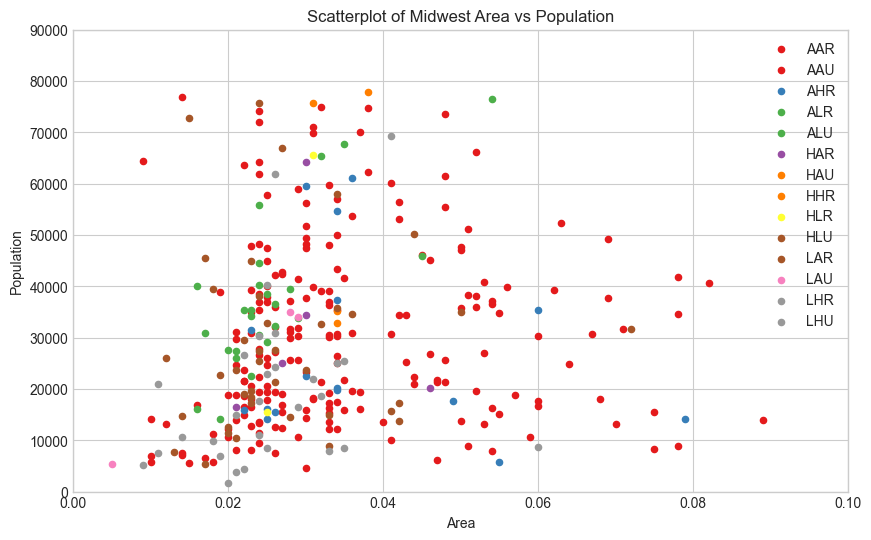

In [7]:
"""
一、关联（Correlation）关系图
1、散点图（Scatter plot）
该图展示两个变量间的关系，matplotlib中使用plt.scatter()函数。当数据包含多组时，可以使用不同颜色或者形状区分。
"""
# Import dataset
midwest = pd.read_csv("./datasets/midwest_filter.csv")

# Prepare Data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s=20,
                c=np.array(colors[i]).reshape(1,-1),
                label=str(category))

# Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Area', fontdict={'fontsize': 10})
plt.ylabel('Population', fontdict={'fontsize': 10})
plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [ ]:
"""
关于散点图更详细的介绍戳：(jupyter notebook 代码后续整理出来）
「Python可视化20|Seaborn散点图&&折线图」
「Python可视化|matplotlib10-绘制散点图scatter」
"""

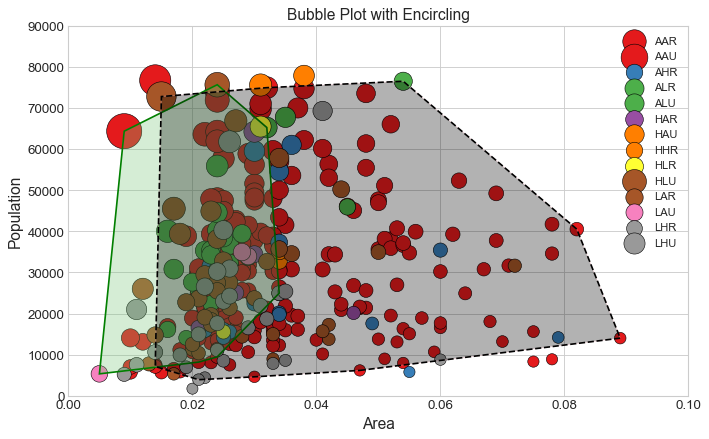

In [9]:
"""
2、边界气泡图（Bubble plot with Encircling）
该图也是一类散点图，只不使用边界圈住一部分点，以强调其重要性。
"""
from matplotlib import patches
from scipy.spatial import ConvexHull  #更多参考scipy.spatial.ConvexHull
sns.set_style("whitegrid")

# Step 1: Prepare Data
midwest = pd.read_csv("./datasets/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [
    plt.cm.Set1(i / float(len(categories) - 1)) for i in range(len(categories))
]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area',
                'poptotal',
                data=midwest.loc[midwest.category == category, :],
                s='dot_size',
                c=np.array(colors[i]).reshape(1,-1),
                label=str(category),
                edgecolors='black',
                linewidths=.5)


# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):  #定义encircle函数，圈出重点关注的点
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data1 = midwest.loc[midwest.state == 'IN', :]
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="pink",
         fc="#74C476",
         alpha=0.3)
encircle(midwest_encircle_data1.area,
         midwest_encircle_data1.poptotal,
         ec="g",
         fc="none",
         linewidth=1.5)

midwest_encircle_data6 = midwest.loc[midwest.state == 'WI', :]
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="pink",
         fc="black",
         alpha=0.3)
encircle(midwest_encircle_data6.area,
         midwest_encircle_data6.poptotal,
         ec="black",
         fc="none",
         linewidth=1.5,
         linestyle='--')

# Step 4: Decorations
plt.gca().set(
    xlim=(0.0, 0.1),
    ylim=(0, 90000),
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Area', fontdict={'fontsize': 14})
plt.ylabel('Population', fontdict={'fontsize': 14})
plt.title("Bubble Plot with Encircling", fontsize=14)
plt.legend(fontsize=10)
plt.show()

<Figure size 3200x2400 with 0 Axes>

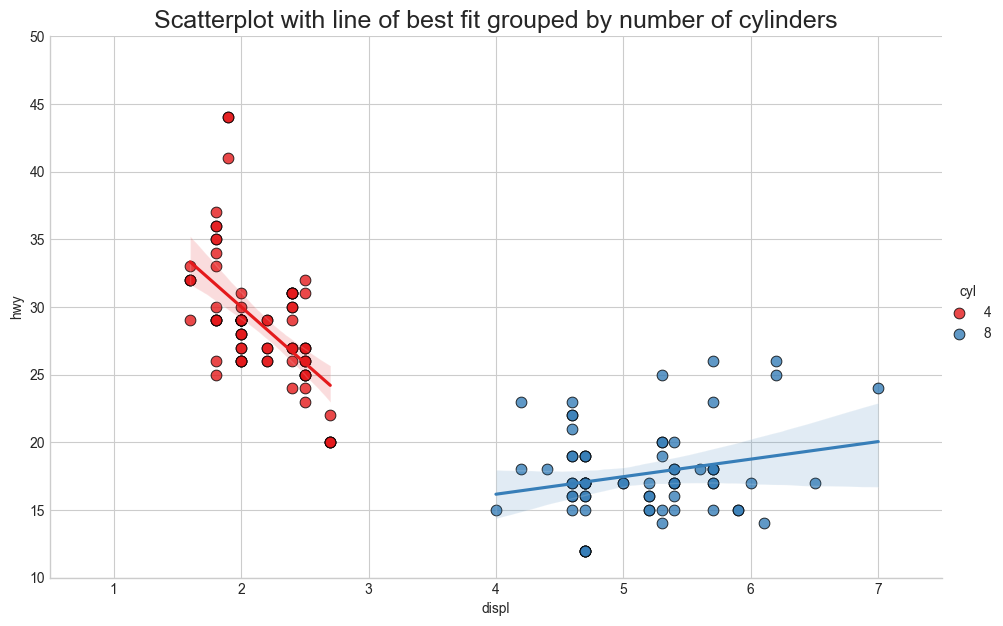

In [10]:
"""
3、散点图添加趋势线（Scatter plot with linear regression line of best fit）
添加趋势线反映两个变量是正相关、负相关或者无相关关系。
"""
# Import Data
plt.figure(dpi=500)
df = pd.read_csv("./datasets/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot

gridobj = sns.lmplot(
    x="displ",
    y="hwy",
    hue="cyl",
    data=df_select,
    height=7,
    aspect=1.6,  #robust=True, 
    palette='Set1',
    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 50))
gridobj.fig.set_size_inches(10, 6)
plt.title("Scatterplot with line of best fit grouped by number of cylinders")
plt.show()

In [ ]:
"""
关于添加趋势线：
「Python可视化27|seaborn绘制线型回归图曲线」
"""

<Figure size 1280x960 with 0 Axes>

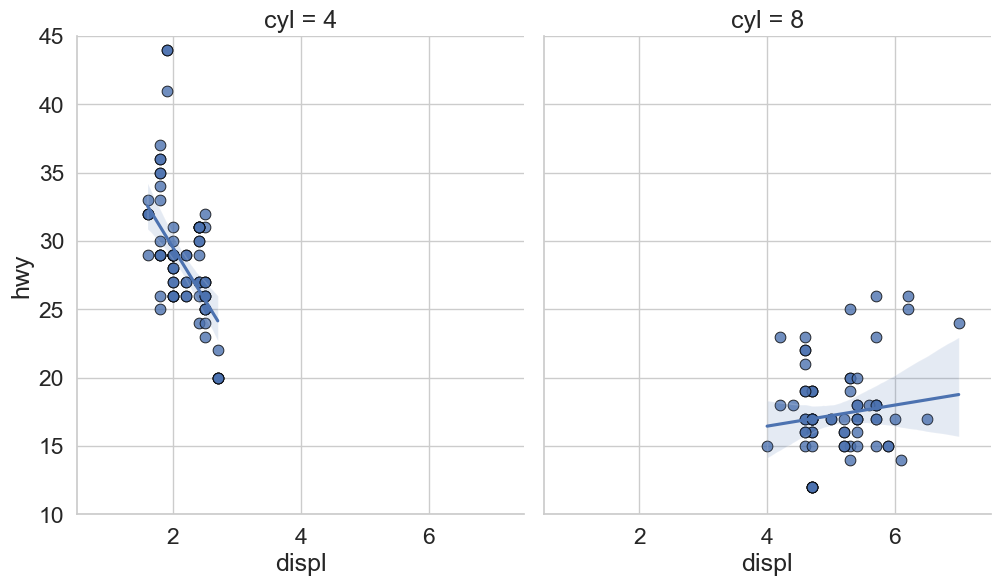

In [12]:
"""
4、分面散点图添加趋势线（Each regression line in its own column）
添加趋势线反映两个变量是正相关、负相关或者无相关关系。
"""
# Import Data
plt.figure(dpi=200)

df = pd.read_csv("./datasets/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Each line in its own column
gridobj = sns.lmplot(x="displ",
                     y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
sns.set(style="whitegrid", font_scale=1.5)
gridobj.set(xlim=(0.5, 7.5), ylim=(10, 45))
gridobj.fig.set_size_inches(10, 6)
plt.show()

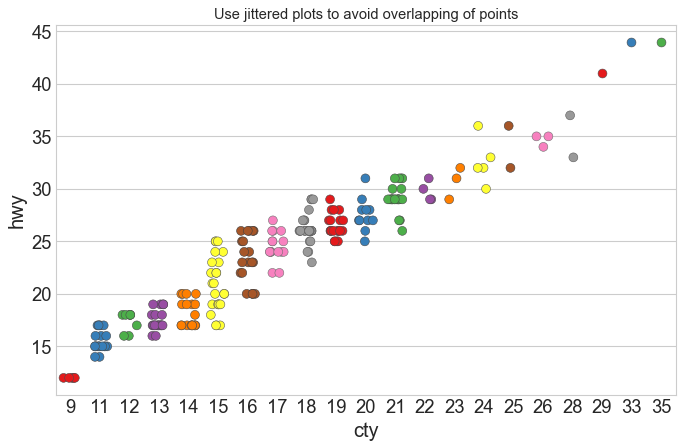

In [15]:
"""
5、抖动图（Jittering with stripplot）
多个点具有完全相同的X和Y值, 为避免多个点相互绘制并隐藏，可稍微抖动点，以便直观地看到它们。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")
# Draw Stripplot
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(x=df.cty,
              y=df.hwy,
              jitter=0.25,
              size=8,
              ax=ax,
              linewidth=.5,
              palette='Set1')

# Decorations
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Use jittered plots to avoid overlapping of points')
plt.show()

In [ ]:
"""
关于Seaborn.stripplot参考：
「Python可视化21|Seaborn.catplot(上)-小提琴图等四类图」
"""

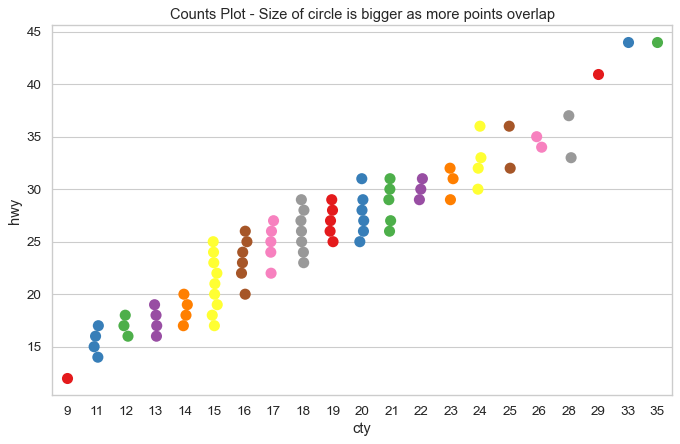

In [27]:
"""
6、计数图（Counts Plot）
区别于抖动图，多个点相互绘制并隐藏时，可使用点的大小区分重叠的程度，点的大小越大，周围的点的集中度就越大，重叠的越多。
"""
#友情提示：当matplotlib>=3.2出现报错ValueError: s must be a scalar, or the same size as x and y时
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
# Draw Stripplot
#print(df_counts.counts * 2) Name: counts, Length: 78, dtype: int64
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
sns.stripplot(x=df_counts.cty,
              y=df_counts.hwy,
              size=10,
              ax=ax,
              palette='Set1')

# Decorations
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Counts Plot - Size of circle is bigger as more points overlap')
plt.show()

In [ ]:
"""
关于Counts Plot更多介绍：
「Python可视化22|Seaborn.catplot(下)-boxenplot|barplot|countplot图」
"""

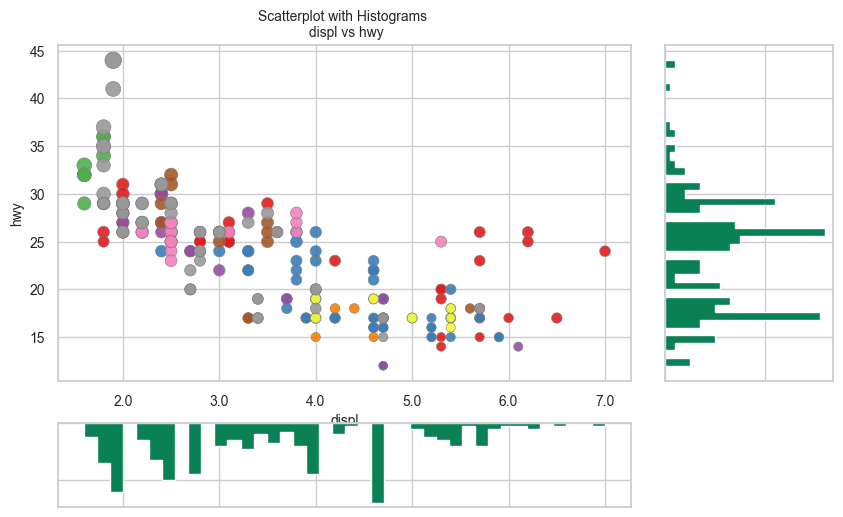

In [28]:
"""
7、边缘直方图（Marginal Histogram）¶
用于展示X和Y之间的关系、及X和Y的单变量分布情况，常用于数据探索分析。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 6), dpi=100)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 4,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='gray',
                linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ,
               40,
               histtype='stepfilled',
               orientation='vertical',
               color='#098154')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy,
              40,
              histtype='stepfilled',
              orientation='horizontal',
              color='#098154')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')
ax_main.title.set_fontsize(10)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(10)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

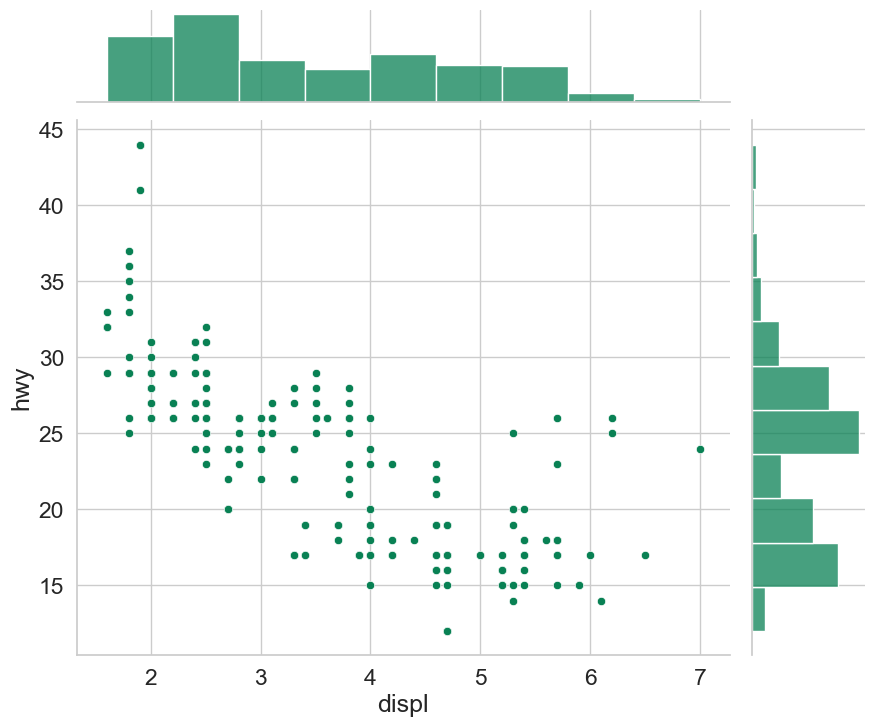

In [29]:
"""
虽然效果不错，但是画的太辛苦了，seaborn几行代码的事~~

"""
df = pd.read_csv("./datasets/mpg_ggplot2.csv")
sns.set(style="whitegrid", font_scale=1.5)  #设置主题，文本大小
g = sns.jointplot(
    x='displ',
    y='hwy',
    data=df,  #输入两个绘图变量
    color='#098154',  #修改颜色
)
g.fig.set_size_inches(10, 8)  #设置图尺寸

In [ ]:
"""
更多关于边缘图：
「Python可视化24|seaborn绘制多变量分布图（jointplot|JointGrid）」
"""

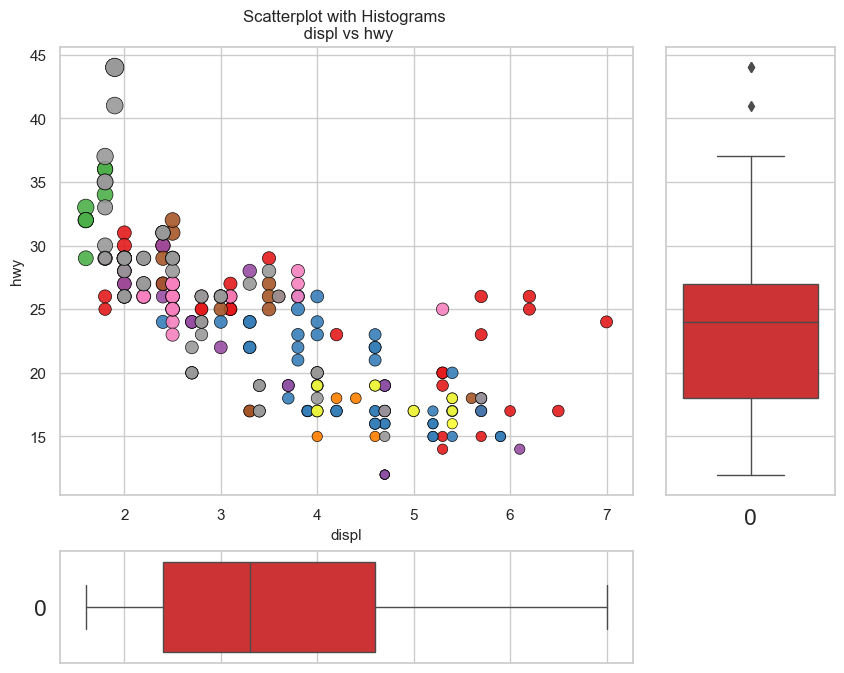

In [30]:
"""
8、边缘箱图（Marginal Boxplot）
类似于边缘直方图，不过箱线图有助于精确定位变量的分位数。
"""
#中间散点图，右边和下边分别绘制y轴及x轴数据的箱图，
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(10, 8), dpi=100)
grid = plt.GridSpec(
    4, 4, hspace=0.5, wspace=0.2
)  #这里使用了matplotlib.pyplot.GridSpec分片figure，其实可以直接使用seaborn中的，前面讲过

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ',
                'hwy',
                s=df.cty * 5,
                c=df.manufacturer.astype('category').cat.codes,
                alpha=.9,
                data=df,
                cmap="Set1",
                edgecolors='black',
                linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v", linewidth=1, palette='Set1')
sns.boxplot(df.displ, ax=ax_bottom, orient="h", linewidth=1, palette='Set1')

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy',
            xlabel='displ',
            ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(12)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] +
             ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(11)

plt.show()

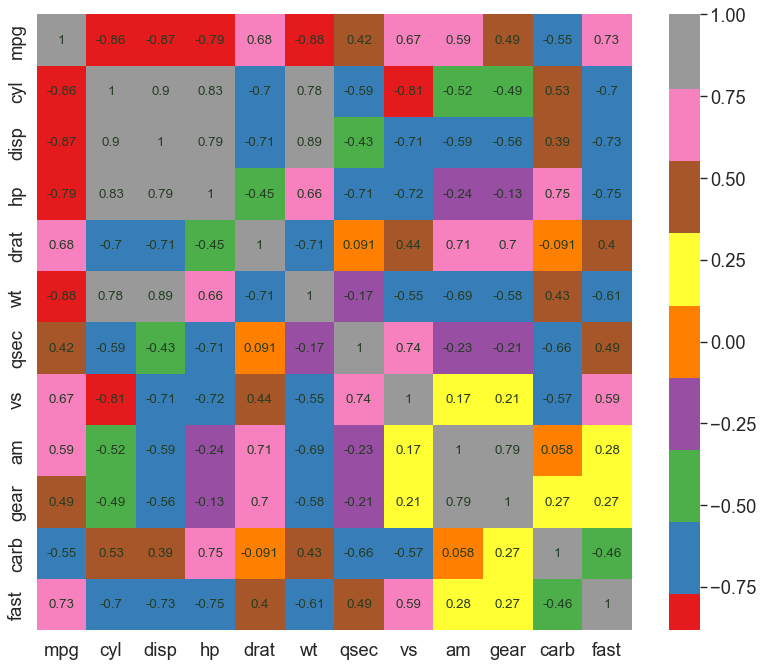

In [31]:
"""
9、相关性热图（Correllogram）
直观地度量给定DtaFrame (or 2D array)中所有可能的数值变量对之间的相关性差异。
"""
df = pd.read_csv("./datasets/mtcars.csv")
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(
    df.corr(),
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
    cmap='Set1',
    center=0,
    annot=True,
    annot_kws={
        'size': 12,
        'weight': 'normal',
        'color': '#253D24'
    },
)
plt.show()

In [ ]:
"""
更多关于热图：
「Python可视化matplotlib&seborn16-相关性heatmap」
「Python可视化matplotlib&seborn15-聚类热图clustermap」
「Python可视化matplotlib&seborn14-热图heatmap」
"""

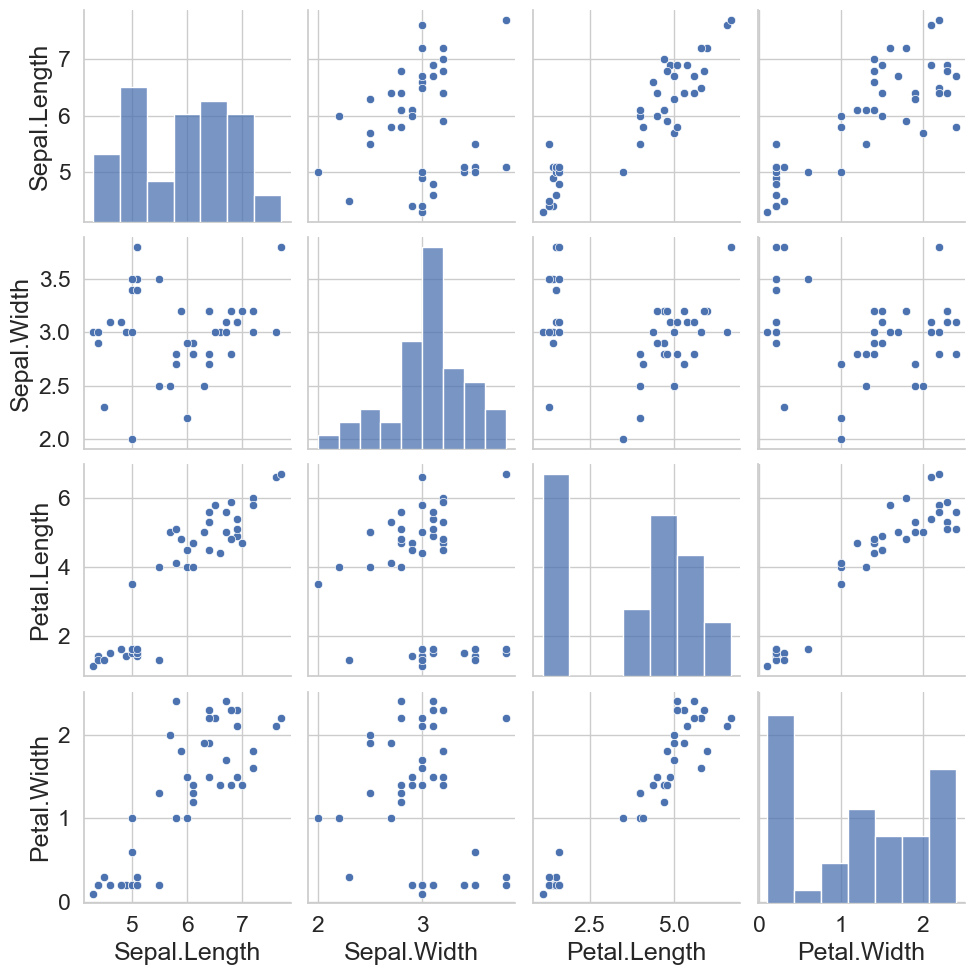

In [32]:
"""
10、矩阵图 （Pairwise Plot）
数据探索阶段必备工具，用来探索各个数值型变量之间关系。
"""
df = pd.read_csv("./datasets/iris_test.csv")

# Plot

sns.pairplot(df)
plt.show()

<Figure size 800x640 with 0 Axes>

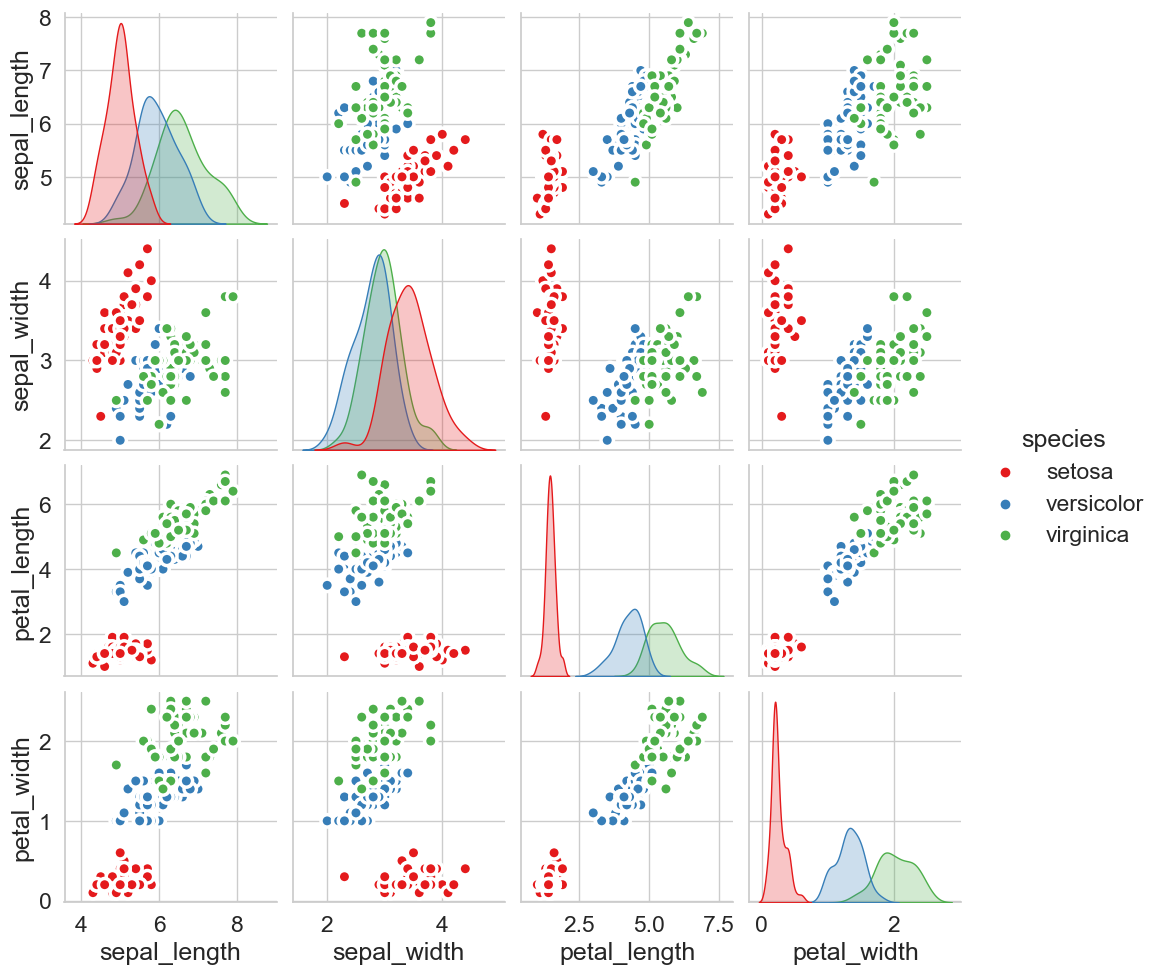

In [39]:
"""
给每个特征加入分类。
"""
#加载本地的iris dataset，无法联网下载数据集，须从https://github.com/mwaskom/seaborn-data下载
#或从国内镜像网站下载 seaborn 数据集到本地（或者通过其他的方法将数据集下载到本地），比如：
#https://labfile.oss.aliyuncs.com/courses/2616/seaborn-data.zip
df = sns.load_dataset('iris', data_home='./seaborn-data', cache=True)

# Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df,
             kind="scatter",
             hue="species",
             palette='Set1',
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [ ]:
"""
更详细矩阵图教程：
「Python可视化25|seaborn绘制矩阵图」
"""

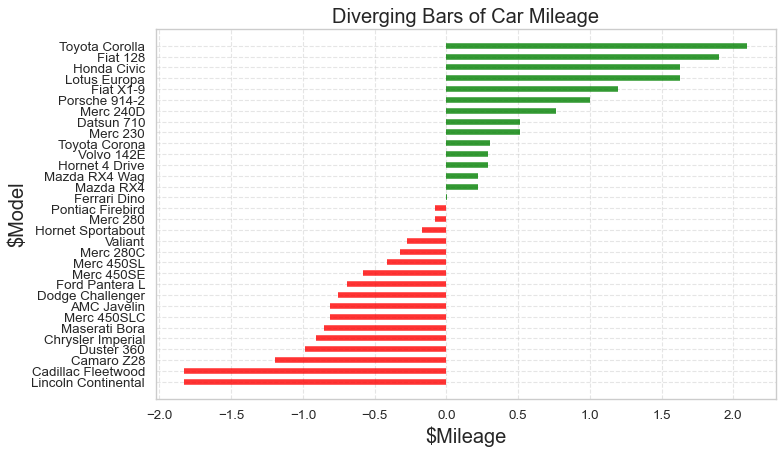

In [41]:
"""
二、偏差 （Deviation）关系图
11、发散型柱形图 （Diverging Bars）¶
展示单个指标的变化的顺序和数量。
"""
df = pd.read_csv("./datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10, 6), dpi=80)
plt.hlines(y=df.index,
           xmin=0,
           xmax=df.mpg_z,
           color=df.colors,
           alpha=0.8,
           linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model', xlabel='$Mileage')
plt.yticks(df.index, df.cars, fontsize=12)
plt.xticks(fontsize=12)
plt.title('Diverging Bars of Car Mileage')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

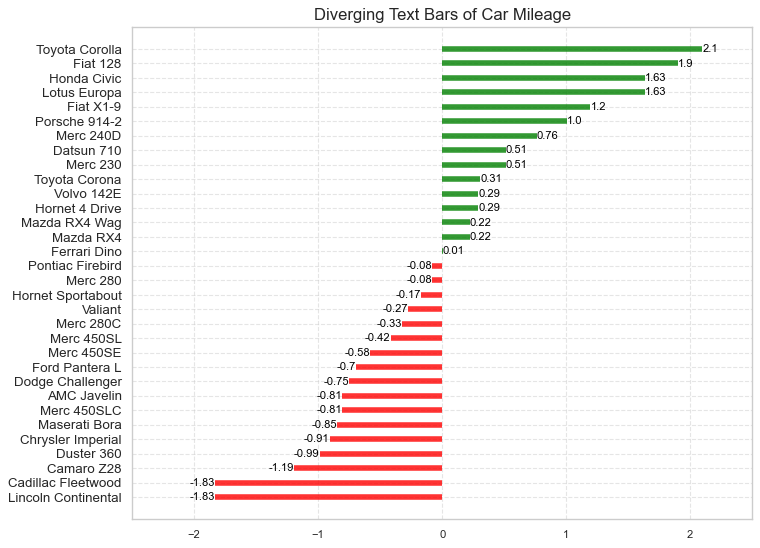

In [42]:
"""
12、发散型文本图（Diverging Texts）-水平方向
和上一个图的区别是该图在柱子上添加了数值文本。
"""
# Prepare Data
df = pd.read_csv("./datasets/mtcars.csv")
#df['Species'] = 
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10,8), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z,color=df.colors, alpha=0.8, linewidth=5)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'black' if x < 0 else 'black', 'size':10})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.xticks(fontsize=10)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':15})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()
#垂直版感兴趣可以改改就可以了

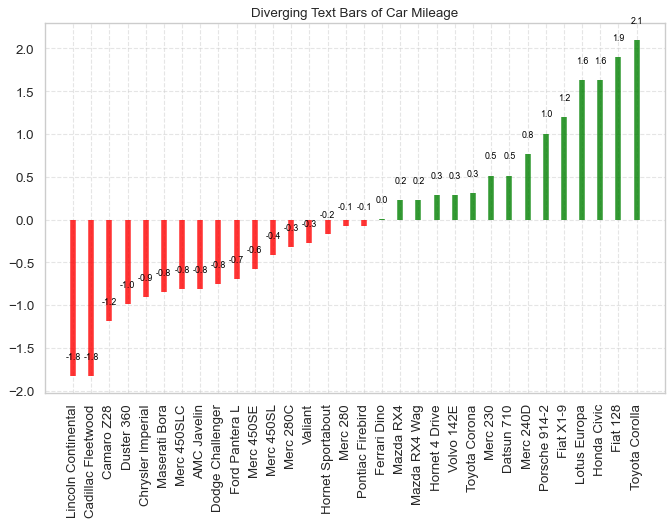

In [43]:
"""
13、发散型文本图（Diverging Texts）-垂直方向
"""
# Prepare Data
df = pd.read_csv("./datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(10, 6), dpi=80)
plt.vlines(x=df.index,
           ymin=0,
           ymax=df.mpg_z,
           color=df.colors,
           alpha=0.8,
           linewidth=5)
for y, x, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x,
                 y+0.2,
                 round(tex, 1),
                 horizontalalignment='center',
                 fontdict={
                     'color': 'black' if x < 0 else 'black',
                     'size': 8
                 })

# Decorations
plt.xticks(df.index, df.cars, fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size': 12})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

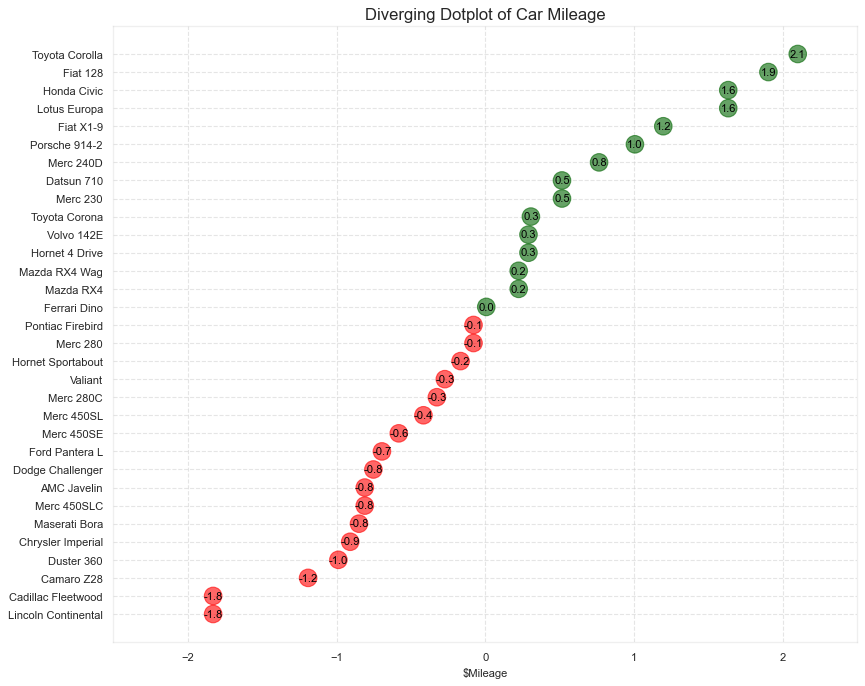

In [45]:
"""
14、发散型点图（Diverging Dot Plot）
与发散性文本图的区别是缺失柱子，减少了组之间的对比差异。
"""
# Prepare Data
df = pd.read_csv("./datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(df.mpg_z, df.index, s=250, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x,
                 y,
                 round(tex, 1),
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontdict={'color': 'black','size': '10'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars,fontsize=10)
plt.xticks(fontsize=10)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size': 15})
plt.xlabel('$Mileage',fontsize=10)
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

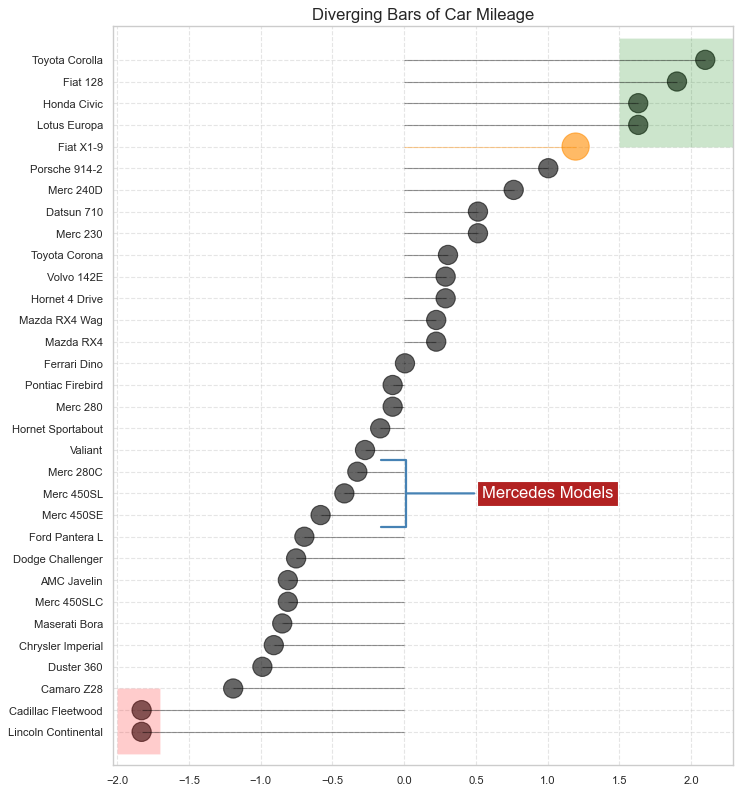

In [46]:
"""
15、带Marker的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）
使用不同形状，强调重点关注的数据区域。
"""
# Prepare Data
df = pd.read_csv("./datasets/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(10, 12), dpi=80)
plt.hlines(y=df.index,
           xmin=0,
           xmax=df.mpg_z,
           color=df.colors,
           alpha=0.4,
           linewidth=1)
plt.scatter(df.mpg_z,
            df.index,
            color=df.colors,
            s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars],
            alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models',
             xy=(0.0, 11.0),
             xytext=(1.0, 11),
             xycoords='data',
             fontsize=15,
             ha='center',
             va='center',
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                             lw=2.0,
                             color='steelblue'),
             color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1),
                       width=.3,
                       height=3,
                       alpha=.2,
                       facecolor='red')
p2 = patches.Rectangle((1.5, 27),
                       width=.8,
                       height=5,
                       alpha=.2,
                       facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 15})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

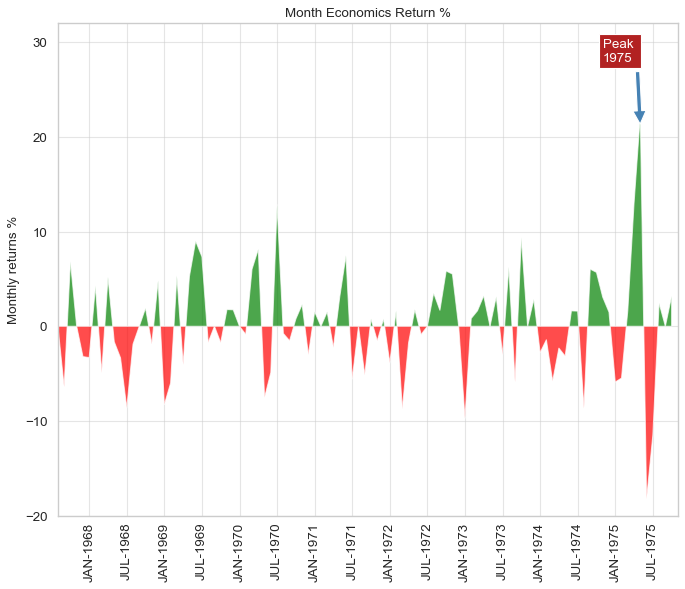

In [47]:
"""
16、面积图（Area Chart）
将曲线与坐标轴之间区域上色得面积图，面积图能够很好的展示整体与局部数据的关系，直观展示整体走势、展示不同元素的涨跌状况。
"""
# Prepare Data
df = pd.read_csv("./datasets/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0) / df.psavert.shift(1)).fillna(0) * 100

# Plot使用plt.fill_between
plt.figure(figsize=(10, 8), dpi=80)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] >= 0,
                 facecolor='green',
                 interpolate=True,
                 alpha=0.7)
plt.fill_between(x[1:],
                 y_returns[1:],
                 0,
                 where=y_returns[1:] <= 0,
                 facecolor='red',
                 interpolate=True,
                 alpha=0.7)

# Annotate
plt.annotate('Peak \n1975',
             xy=(94.0, 21.0),
             xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05),
             fontsize=12,
             color='white')

# Decorations
xtickvals = [
    str(m)[:3].upper() + "-" + str(y)
    for y, m in zip(df.date.dt.year, df.date.dt.month_name())
]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6],
                          rotation=90,
                          fontdict={
                              'horizontalalignment': 'center',
                              'verticalalignment': 'center_baseline',
                              'size': 12
                          })
plt.ylim(-20, 32)
plt.xlim(1, 100)
plt.yticks(fontsize=12)
plt.title("Month Economics Return %", fontsize=12)
plt.ylabel('Monthly returns %', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

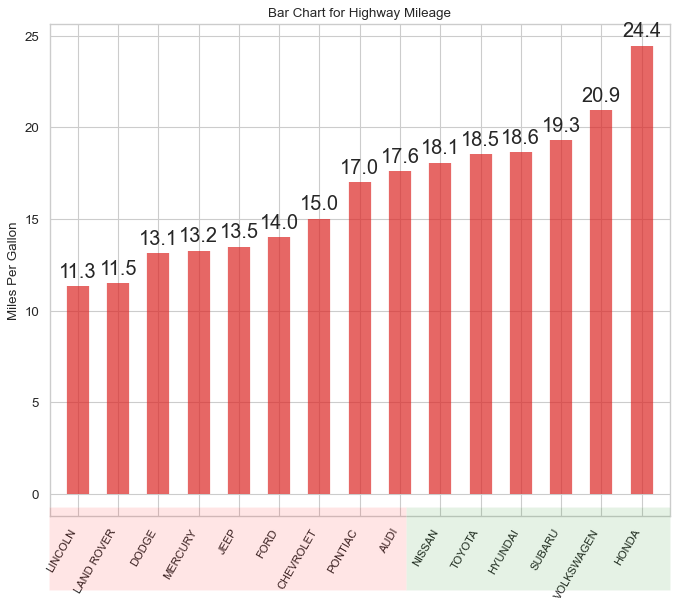

In [48]:
"""
三、排序 （Ranking）关系图
17、排序柱形图（Ordered Bar Chart）
"""
# Prepare Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")
df = df_raw[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 8), facecolor='white', dpi=80)
ax.vlines(x=df.index,
          ymin=0,
          ymax=df.cty,
          color='#dc2624',
          alpha=0.7,
          linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size': 12})
plt.xticks(df.index,
           df.manufacturer.str.upper(),
           rotation=60,
           horizontalalignment='right',
           fontsize=10)
plt.yticks(fontsize=12)
plt.ylabel('Miles Per Gallon', fontsize=12)
plt.ylim = (0, 30)

# 添加底纹
p1 = patches.Rectangle((.57, -0.005),
                       width=.33,
                       height=.13,
                       alpha=.1,
                       facecolor='green',
                       transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005),
                       width=.446,
                       height=.13,
                       alpha=.1,
                       facecolor='red',
                       transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

In [ ]:
"""
更多条形图介绍：
「Python可视化|matplotlib12-垂直|水平|堆积条形图详解」
"""

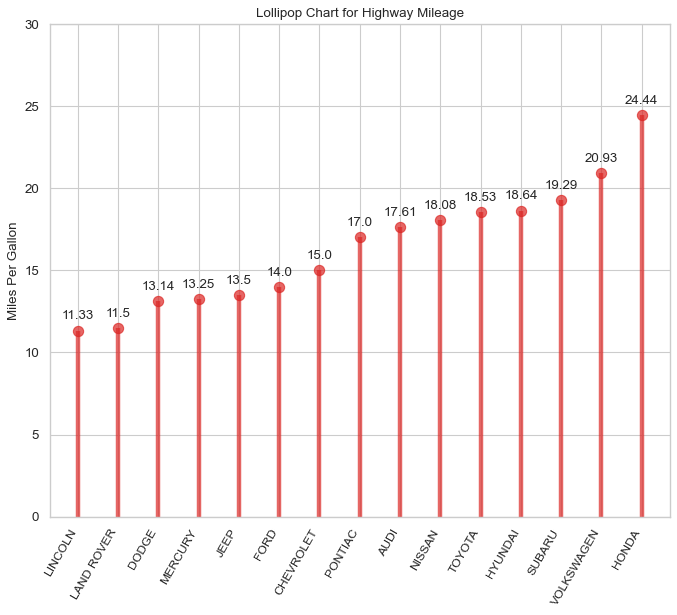

In [49]:
"""
18、棒棒糖图(Lollipop Chart)
将上面的柱子换做棒棒即可，效果也一样~~
"""
# 棒棒糖图(Lollipop Chart)
# Prepare Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")
df = df_raw[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.vlines(x=df.index,
          ymin=0,
          ymax=df.cty,
          color='#dc2624',
          alpha=0.7,
          linewidth=4)
ax.scatter(x=df.index, y=df.cty, s=85, color='#dc2624', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size': 12})

plt.ylabel('Miles Per Gallon', fontsize=12)
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(),
                   rotation=60,
                   fontdict={
                       'horizontalalignment': 'right',
                       'size': 11
                   })
ax.set_ylim(0, 30)
plt.yticks(fontsize=12)

# Annotate
for row in df.itertuples():
    ax.text(row.Index,
            row.cty + .5,
            s=round(row.cty, 2),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=12)

plt.show()

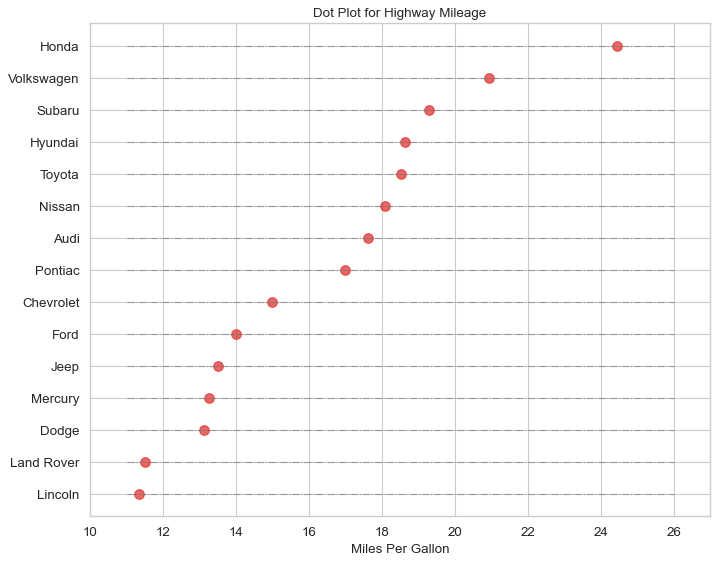

In [51]:
"""
19、点图 （Dot Plot）
将上面的棒棒去掉并水平放置即可，效果也一样~~ ，在水平方向展示各个指标的排名情况。
"""
# Prepare Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")
df = df_raw[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.hlines(y=df.index,
          xmin=11,
          xmax=26,
          color='gray',
          alpha=0.7,
          linewidth=1,
          linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='#dc2624', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size': 12})

plt.xlabel('Miles Per Gallon', fontsize=12)

ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(),
                   fontdict={
                       'horizontalalignment': 'right',
                       'fontsize': 12
                   })

plt.xticks(fontsize=12)
ax.set_xlim(10, 27)
plt.show()

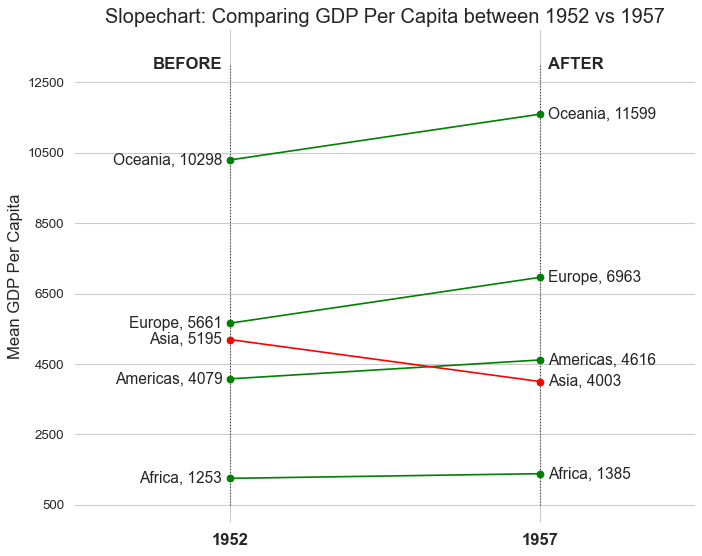

In [52]:
"""
20、坡图（Slope Chart）
很好的比较多项目两个不同时期的情况。
"""
#comparing the ‘Before’ and ‘After’ positions of a given person/item
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("./datasets/gdppercap.csv")

left_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1952'])
]
right_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(df.continent, df['1957'])
]
klass = [
    'red' if (y1 - y2) < 0 else 'green'
    for y1, y2 in zip(df['1952'], df['1957'])
]


# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                      color='red' if p1[1] - p2[1] > 0 else 'green',
                      marker='o',
                      markersize=6)
    ax.add_line(l)
    return l


fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=80)

# Vertical Lines
ax.vlines(x=1,
          ymin=500,
          ymax=13000,
          color='black',
          alpha=0.7,
          linewidth=1,
          linestyles='dotted')
ax.vlines(x=3,
          ymin=500,
          ymax=13000,
          color='black',
          alpha=0.7,
          linewidth=1,
          linestyles='dotted')

# Points
ax.scatter(y=df['1952'],
           x=np.repeat(1, df.shape[0]),
           s=10,
           color='black',
           alpha=0.7)
ax.scatter(y=df['1957'],
           x=np.repeat(3, df.shape[0]),
           s=10,
           color='black',
           alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    ax.text(1 - 0.05,
            p1,
            c + ', ' + str(round(p1)),
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05,
            p2,
            c + ', ' + str(round(p2)),
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1 - 0.05,
        13000,
        'BEFORE',
        horizontalalignment='right',
        verticalalignment='center',
        fontdict={
            'size': 15,
            'weight': 700
        })
ax.text(3 + 0.05,
        13000,
        'AFTER',
        horizontalalignment='left',
        verticalalignment='center',
        fontdict={
            'size': 15,
            'weight': 700
        })

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957",
             fontdict={'size': 18})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
plt.ylabel('Mean GDP Per Capita', fontsize=15)
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"], fontdict={'size': 15, 'weight': 700})
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

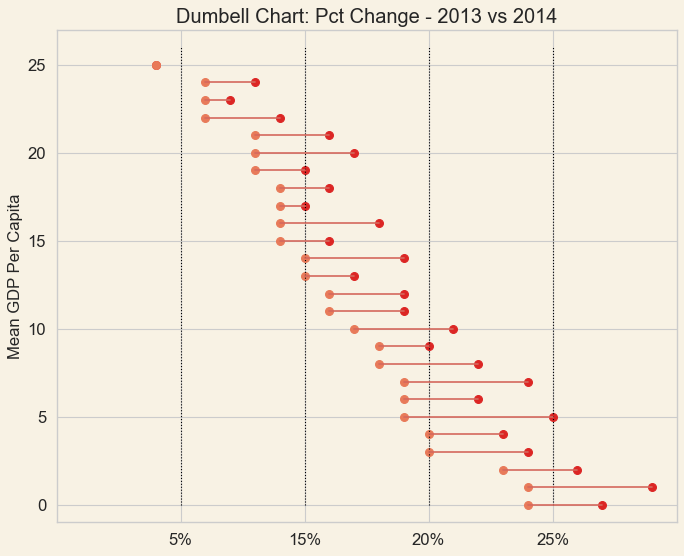

In [53]:
"""
21、哑铃图（Dumbbell Plot）
很好的比较多个项目两个不同时期的情况、更重要的是还会展示不同项目的排序信息。
"""
#显示排序和处理前后值范围
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("./datasets/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)


# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='#d5695d')
    ax.add_line(l)
    return l


# Figure and Axes
fig, ax = plt.subplots(1, 1, figsize=(10, 8), facecolor='#f8f2e4', dpi=80)

# Vertical Lines
ax.vlines(x=.05,
          ymin=0,
          ymax=26,
          color='black',
          alpha=1,
          linewidth=1,
          linestyles='dotted')
ax.vlines(x=.10,
          ymin=0,
          ymax=26,
          color='black',
          alpha=1,
          linewidth=1,
          linestyles='dotted')
ax.vlines(x=.15,
          ymin=0,
          ymax=26,
          color='black',
          alpha=1,
          linewidth=1,
          linestyles='dotted')
ax.vlines(x=.20,
          ymin=0,
          ymax=26,
          color='black',
          alpha=1,
          linewidth=1,
          linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#dc2624')
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#e87a59')

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f8f2e4')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size': 18})
ax.set(xlim=(0, .25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
plt.ylabel('Mean GDP Per Capita', fontsize=15)
plt.yticks(fontsize=15)
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'], fontdict={'size': 15})
plt.show()

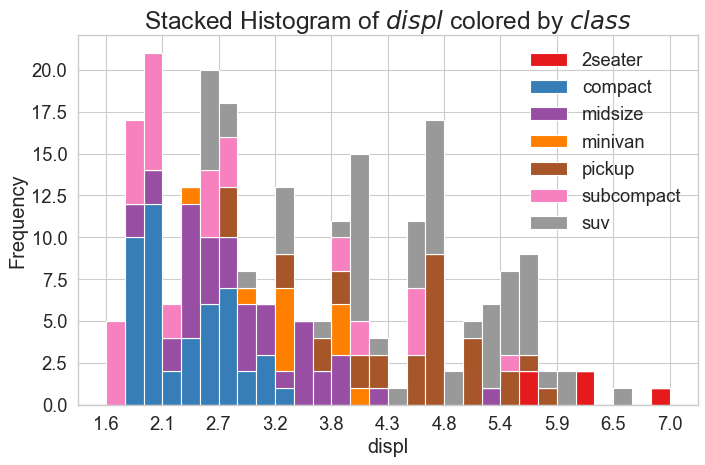

In [54]:
"""
四、分布（Distribution）关系图
21、连续变量堆积直方图（Stacked Histogram for Continuous Variable）
该图展示给定连续变量的频率分布。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(10, 6), dpi=80)
colors = [plt.cm.Set1(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                            30,
                            stacked=True,
                            density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({
    group: col
    for group, col in zip(
        np.unique(df[groupby_var]).tolist(), colors[:len(vals)])
})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
#plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b, 1) for b in bins[::3]])
plt.show()

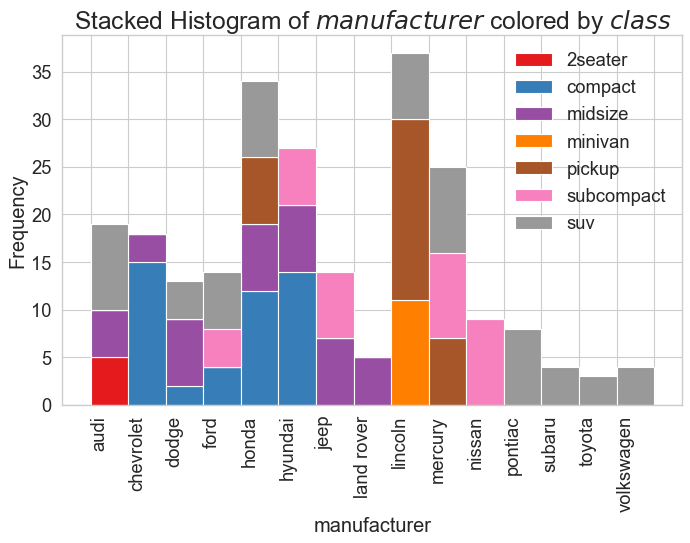

In [63]:
"""
22、类别变量堆积直方图（Stacked Histogram for Categorical Variable）
该图展示给定类别变量的频率分布。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(10, 6), dpi=80)
colors = [plt.cm.Set1(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals,
                            df[x_var].unique().__len__(),
                            stacked=True,
                            density=False,
                            color=colors[:len(vals)])

# Decoration
plt.legend({
    group: col
    for group, col in zip(
        np.unique(df[groupby_var]).tolist(), colors[:len(vals)])
})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",
          fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim=(0, 40)
#可能df[x_var]中数据有重复，所以要加上一个空，避免 plt.xticks 报错
labels=np.unique(df[x_var]).tolist()
labels.append('')
plt.xticks(ticks=bins,
           #labels=np.unique(df[x_var]).tolist(),
           labels=labels,
           rotation=90,
           horizontalalignment='left')
plt.show()

In [ ]:
"""
了解更多直方图：
「Python可视化|matplotlib13-直方图（histogram）详解」
「Python可视化23|seaborn.distplot单变量分布图(直方图|核密度图)」
"""

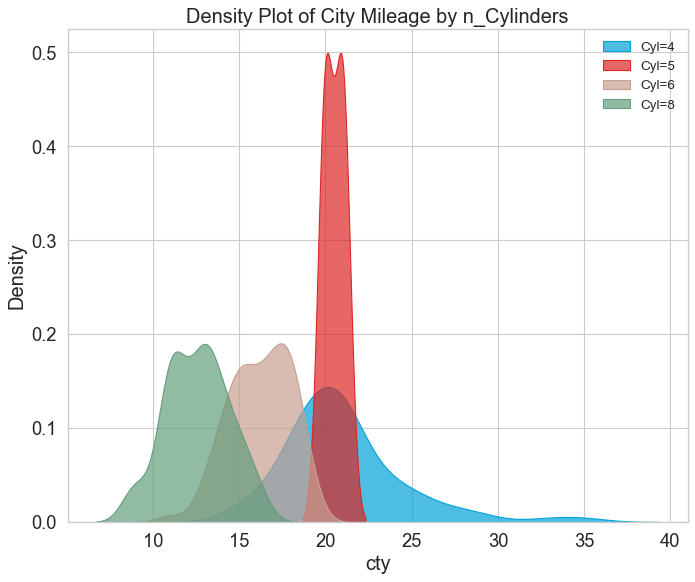

In [64]:
"""
23、密度图(Density Plot)
该图展示连续变量的分布情况。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"],
            shade=True,
            color="#01a2d9",
            label="Cyl=4",
            alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, "cty"],
            shade=True,
            color="#dc2624",
            label="Cyl=5",
            alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"],
            shade=True,
            color="#C89F91",
            label="Cyl=6",
            alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"],
            shade=True,
            color="#649E7D",
            label="Cyl=8",
            alpha=.7)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=18)
plt.legend()
plt.show()

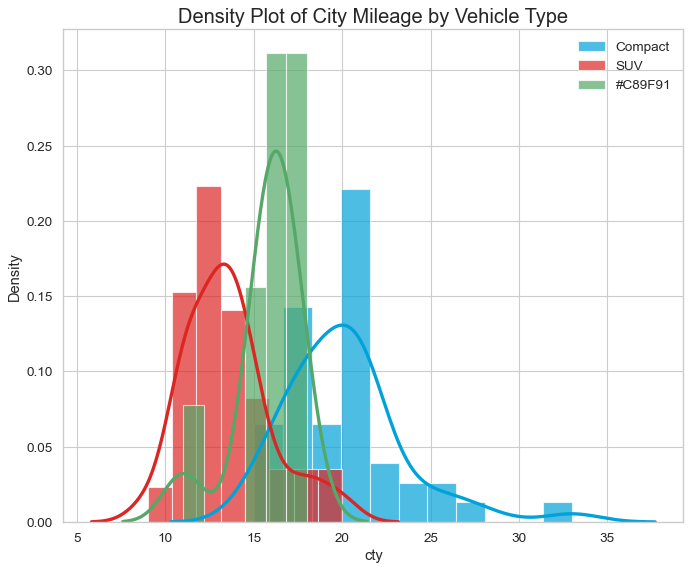

In [66]:
"""
24、带直方图的密度图(Density Curves with Histogram)
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"],
             color="#01a2d9",
             label="Compact",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"],
             color="#dc2624",
             label="SUV",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"],
             color="g",
             label="#C89F91",
             hist_kws={'alpha': .7},
             kde_kws={'linewidth': 3})
plt.ylim=(0, 0.35)

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=18)
plt.legend()
plt.show()

In [ ]:
"""
更多核密度图：
「Python可视化23|seaborn.distplot单变量分布图(直方图|核密度图)」
"""

<Figure size 800x480 with 0 Axes>

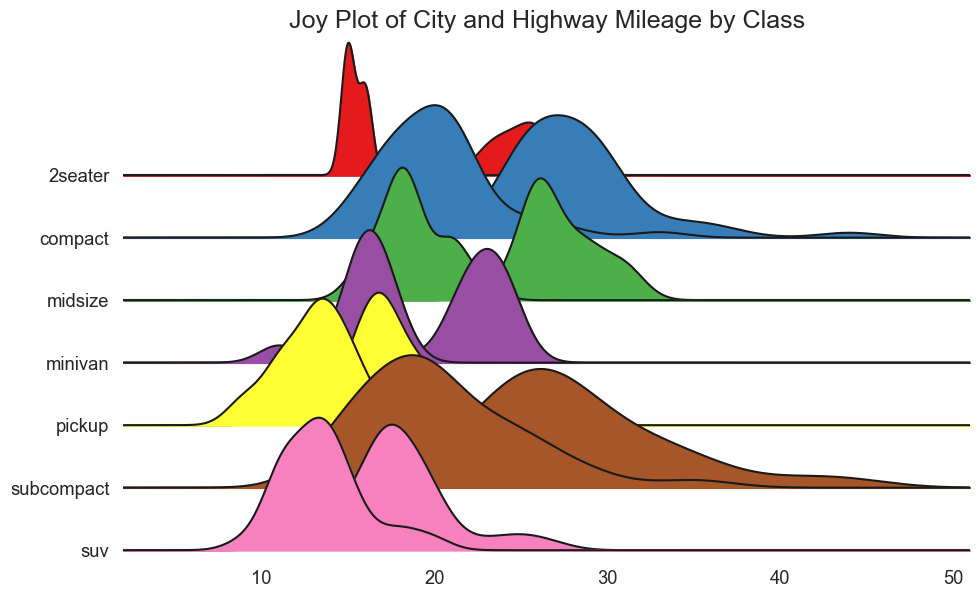

In [68]:
"""
25、山峰叠峦图(Joy Plot)
该图展示大量分组之间的关系，比heatmap形象。
"""
#安装依赖包
#pip install joypy -i https://pypi.tuna.tsinghua.edu.cn/simple
#每组数据绘制核密度图，R中有ggjoy
import joypy
# Import Data
mpg = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
fig, axes = joypy.joyplot(mpg,
                          column=['hwy', 'cty'],
                          by="class",
                          ylim='own',
                          colormap=plt.cm.Set1,
                          figsize=(10, 6))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=18)
plt.show()

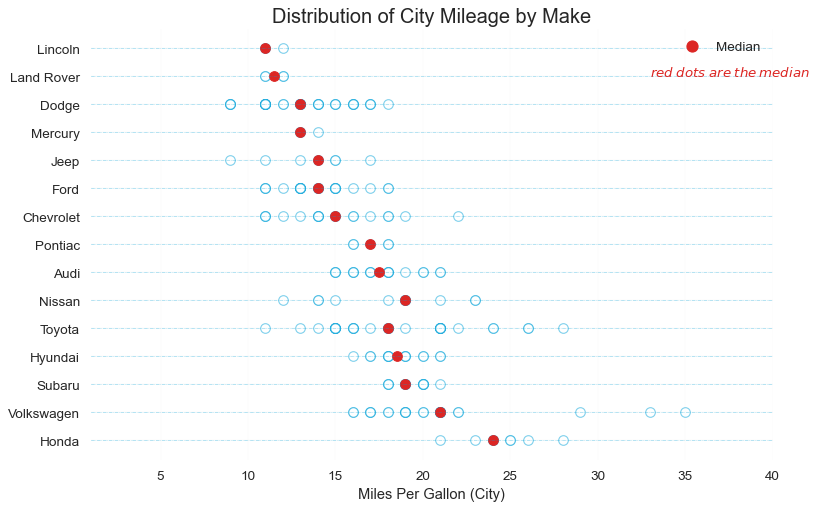

In [76]:
"""
26、分布点图(Distributed Dot Plot)
分布点图显示了按组划分的点的单变量分布。点色越浅，该区域中数据点的集中度越高。通过对中位数进行不同的着色，各组的实际位置会立即变得明显。
"""
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")
cyl_colors = {4: 'tab:red', 5: 'tab:green', 6: 'tab:blue', 8: 'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty',
             'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer'
                    ]].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(11, 7), dpi=80)
ax.hlines(y=df.index,
          xmin=0,
          xmax=40,
          color='#01a2d9',
          alpha=0.5,
          linewidth=.5,
          linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer == make, :]
    ax.scatter(y=np.repeat(i, df_make.shape[0]).tolist(),
               x='cty',
               data=df_make,
               s=75,
               edgecolors='#01a2d9',
               c='w',
               alpha=0.5)
    ax.scatter(y=i,
               x='cty',
               data=df_median.loc[df_median.index == make, :],
               s=75,
               c='#dc2624')

# Annotate
ax.text(33,
        13,
        "$red \; dots \; are \; the \: median$",
        fontdict={'size': 12},
        color='#dc2624')

# Decorations
red_patch = plt.plot([], [],
                     marker="o",
                     ms=10,
                     ls="",
                     mec=None,
                     color='#dc2624',
                     label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size': 18})
ax.set_xlabel('Miles Per Gallon (City)')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(),
                   fontdict={'horizontalalignment': 'right'})
ax.set_xlim(1, 40)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

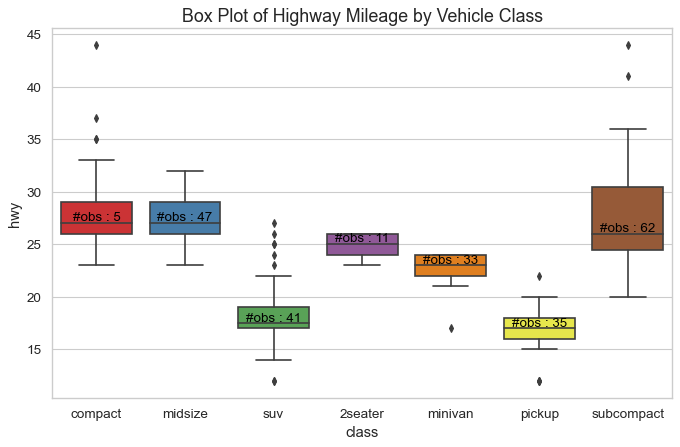

In [78]:
"""
27、箱图（boxplot）
很好的展示数据的分布情况~
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x='class',
    y='hwy',
    data=df,
    notch=False,
    palette="Set1",
)


# Add N Obs inside boxplot (optional)
def add_n_obs(df, group_col, y):
    medians_dict = {
        grp[0]: grp[1][y].median()
        for grp in df.groupby(group_col)
    }
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x,
                 medians_dict[xticklabel] * 1.01,
                 "#obs : " + str(n_ob),
                 horizontalalignment='center',
                 fontdict={'size': 12},
                 color='black')


add_n_obs(df, group_col='class', y='hwy')

# Decoration
sns.set(style="whitegrid", font_scale=1.1)
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=16)
plt.ylim=(10, 40)
plt.show()

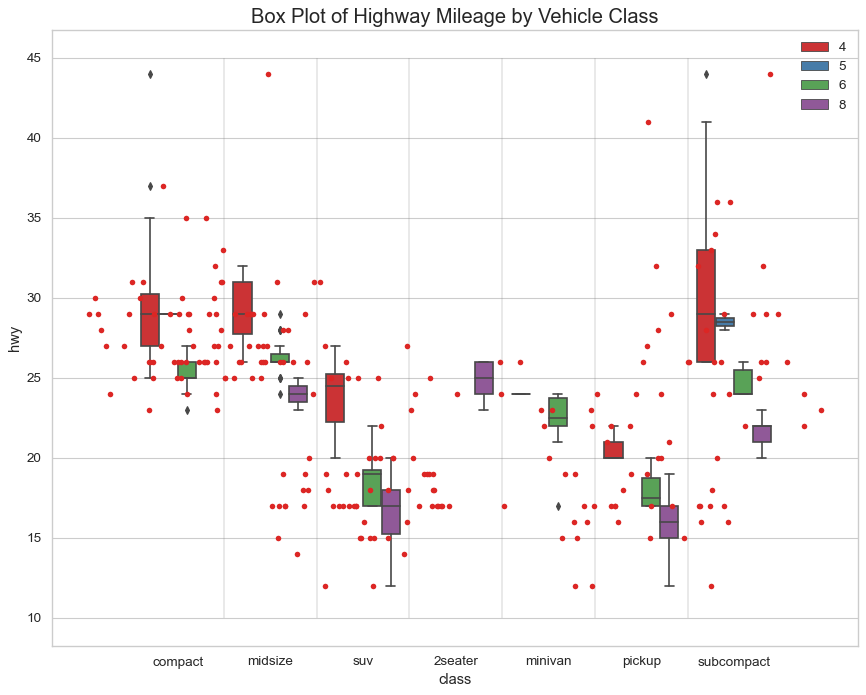

In [79]:
"""
28、箱图结合点图（Dot + Box Plot）
该图展示箱图及箱图绘制所用的详细点。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
sns.boxplot(
    x='class',
    y='hwy',
    data=df,
    hue='cyl',
    palette="Set1",
)
plt.legend(loc=9)
sns.stripplot(x='class',
              y='hwy',
              data=df,
              color='#dc2624',
              size=5,
              jitter=1)

for i in range(len(df['class'].unique()) - 1):
    plt.vlines(i + .5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=18)

plt.show()

In [ ]:
"""
更多关于箱图：
「Python可视化17seborn-箱图boxplot」
「Python可视化22|Seaborn.catplot(下)-boxenplot|barplot|countplot图」
"""

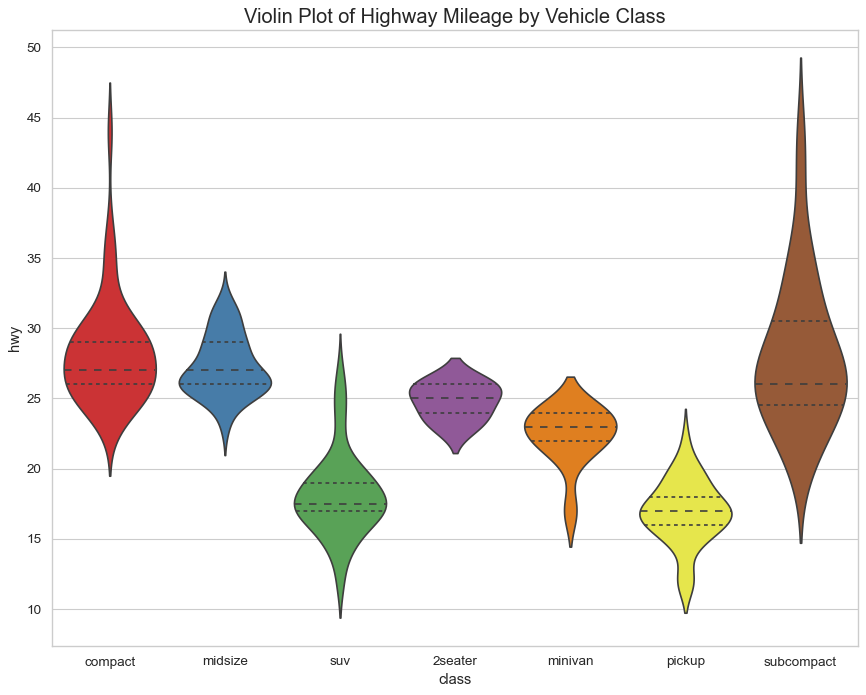

In [80]:
"""
29、小提琴图（Violin Plot）
比箱图更好看，但不常用，小提琴的形状或面积由该位置数据次数决定。
"""
# Import Data
df = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13, 10), dpi=80)
sns.violinplot(x='class',
               y='hwy',
               data=df,
               scale='width',
               palette='Set1',
               inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=18)
plt.show()

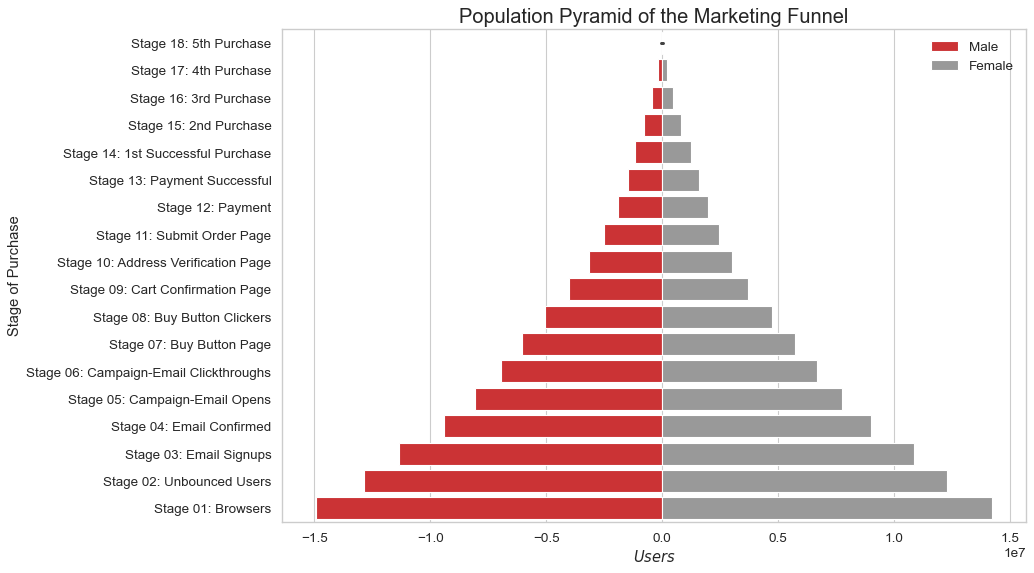

In [81]:
"""
30、金字塔图(Population Pyramid)
可以理解为一种排过序的分组水平柱状图barplot，可很好展示不同分组之间的差异，可可视化逐级过滤或者漏斗的每个阶段。
"""
# Read data
df = pd.read_csv("./datasets/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(12, 8), dpi=80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [
    plt.cm.Set1(i / float(len(df[group_col].unique()) - 1))
    for i in range(len(df[group_col].unique()))
]


for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users',
                y='Stage',
                data=df.loc[df[group_col] == group, :],
                order=order_of_bars,
                color=c,
                label=group)

# Decorations
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=18)
plt.legend()
plt.show()

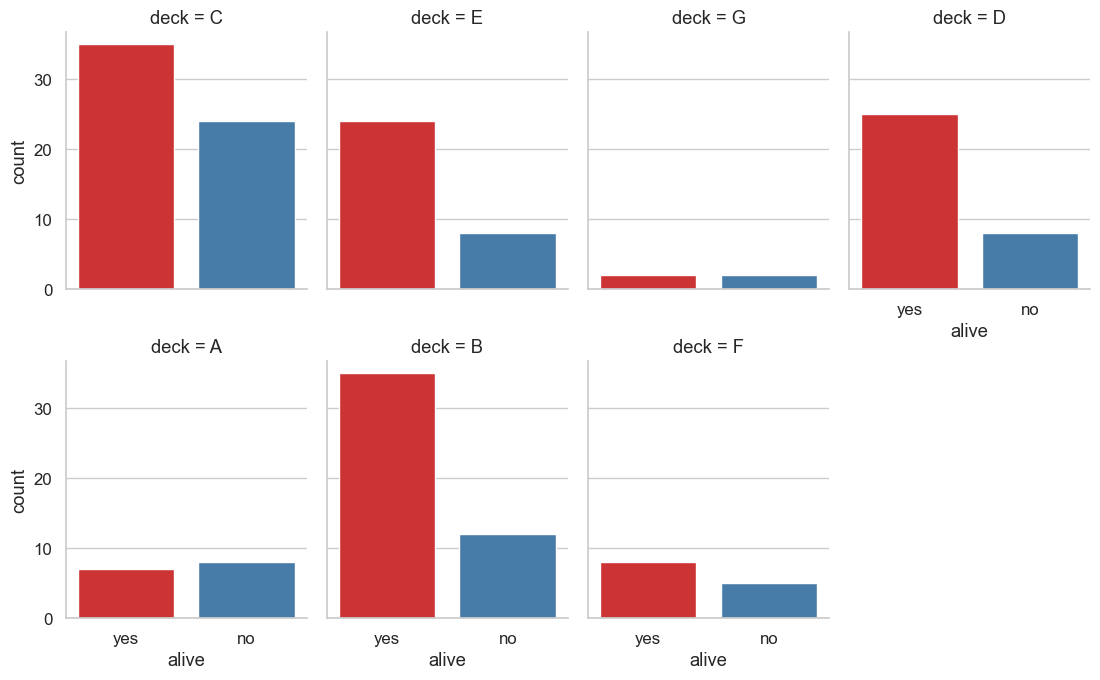

In [91]:
"""
31、分类图（Categorical Plots）
展示彼此相关多个（>=2个）分类变量的计数分布，其实就是seaborn的分面图。
"""
# Load Dataset
titanic = pd.read_csv('./datasets/titanic.csv')
# Plot
g = sns.catplot(x="alive",
                col="deck",
                col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count",
                height=3.5,
                aspect=.8,
                palette='Set1')

plt.show()

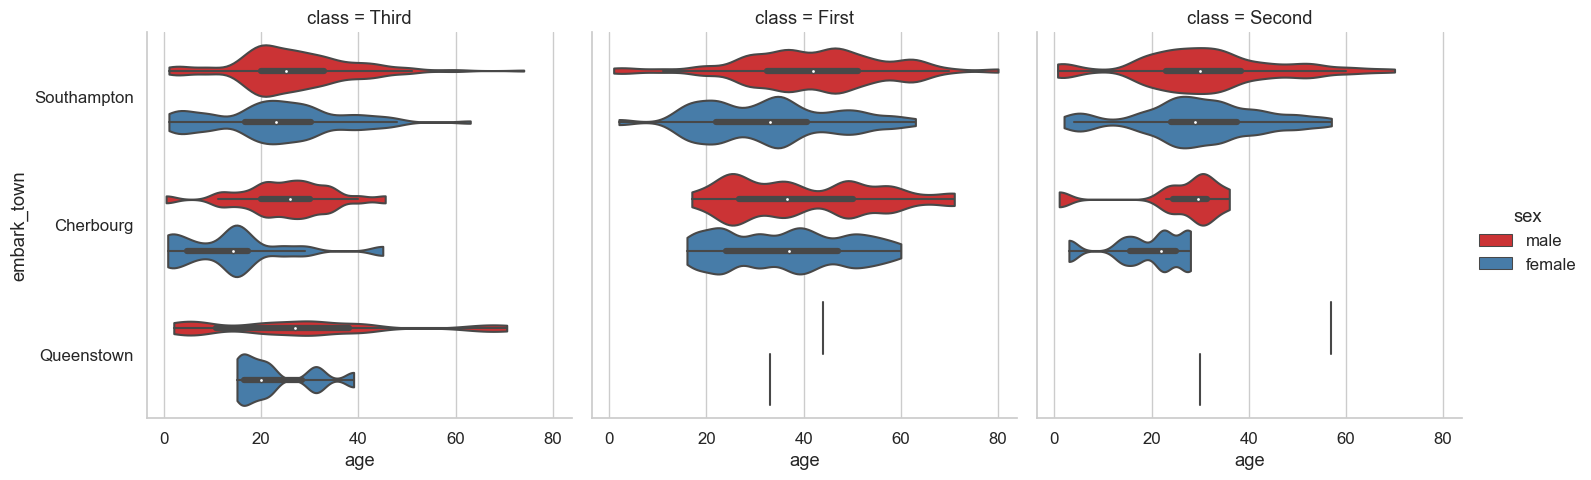

In [92]:
"""
年龄分类
"""
# Plot
sns.catplot(x="age",
            y="embark_town",
            hue="sex",
            col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h",
            height=5,
            aspect=1,
            palette="Set1",
            kind="violin",
            dodge=True,
            cut=0,
            bw=.2)

In [ ]:
"""
更多关于分面图：
「Python可视化26|seaborn绘制分面图（seaborn.FacetGrid）」
"""

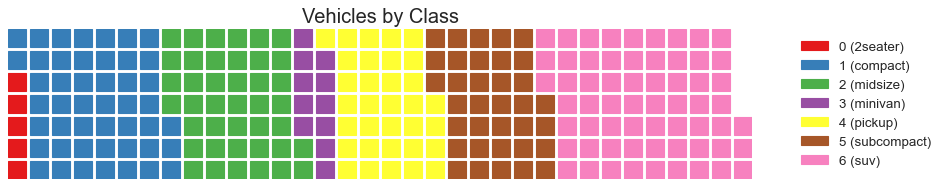

In [96]:
"""
五、组成（Composition）关系图
32、华夫饼图（Waffle Chart）
展示较大数据集中的各个组的组成。
"""
#安装依赖包
#pip install pywaffle -i https://pypi.tuna.tsinghua.edu.cn/simple
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.Set1(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(FigureClass=Waffle,
                 plots={
                     (1,1,1): {
                         'values':
                         df['counts'],
                         'labels': [
                             "{0} ({1})".format(n[0], n[1])
                             for n in df[['class', 'counts']].itertuples()
                         ],
                         'legend': {
                             'loc': 'upper left',
                             'bbox_to_anchor': (1.05, 1),
                             'fontsize': 12
                         },
                         'title': {
                             'label': 'Vehicles by Class',
                             'loc': 'center',
                             'fontsize': 18
                         }
                     },
                 },
                 rows=7,
                 colors=colors,
                 dpi=80,
                 figsize=(12, 9))

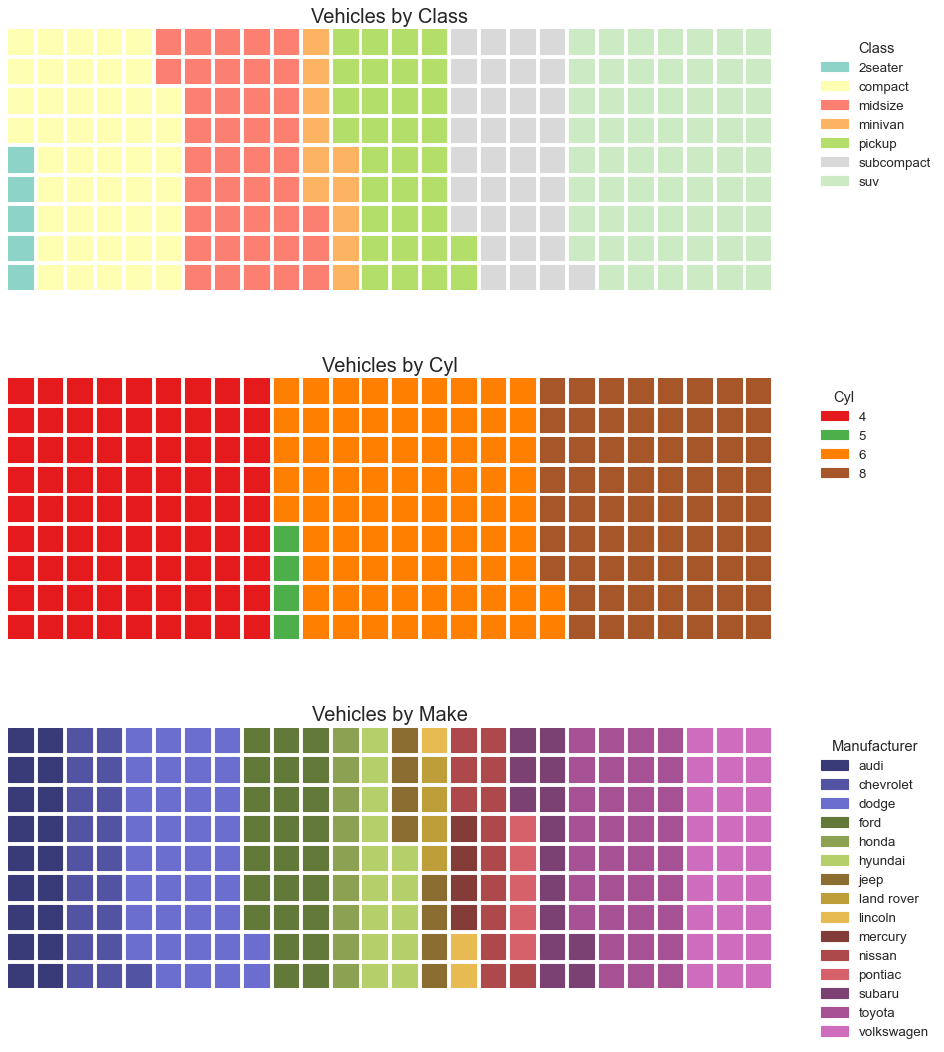

In [97]:
"""
三分类
"""
from pywaffle import Waffle
# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [
    plt.cm.Set3(i / float(n_categories)) for i in range(n_categories)
]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [
    plt.cm.Set1(i / float(n_categories)) for i in range(n_categories)
]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [
    plt.cm.tab20b(i / float(n_categories)) for i in range(n_categories)
]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        (3,1,1): {
            'values':
            df_class['counts_class'],
            'labels': [
                "{1}".format(n[0], n[1])
                for n in df_class[['class', 'counts_class']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Class'
            },
            'title': {
                'label': 'Vehicles by Class',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_class
        },
        (3,1,2): {
            'values':
            df_cyl['counts_cyl'],
            'labels': [
                "{1}".format(n[0], n[1])
                for n in df_cyl[['cyl', 'counts_cyl']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Cyl'
            },
            'title': {
                'label': 'Vehicles by Cyl',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_cyl
        },
        (3,1,3): {
            'values':
            df_make['counts_make'],
            'labels': [
                "{1}".format(n[0], n[1])
                for n in df_make[['manufacturer', 'counts_make']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Manufacturer'
            },
            'title': {
                'label': 'Vehicles by Make',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_make
        }
    },
    rows=9,
    dpi=80,
    figsize=(12, 14))

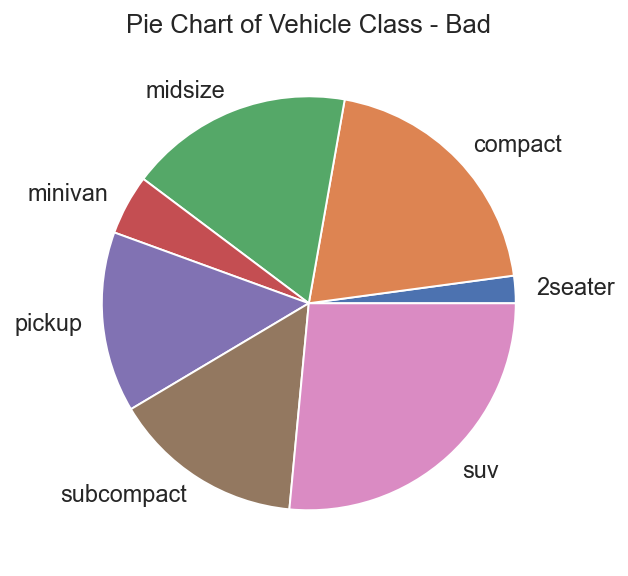

In [98]:
"""
33、饼图（Pie Chart）
"""
# Import
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")
plt.figure(dpi=140)
# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(10, 10))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

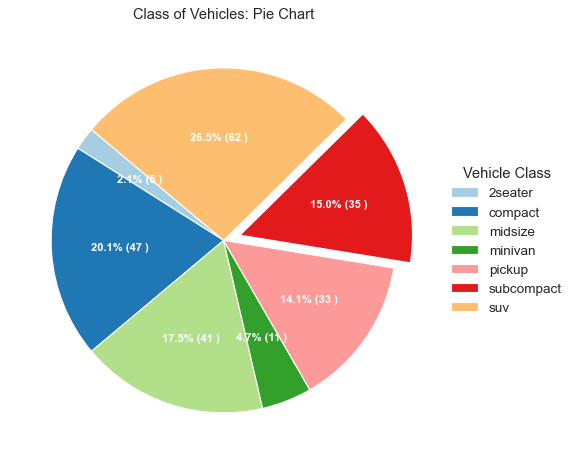

In [99]:
"""
百分占比饼图
"""
# Import
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7),
                       subplot_kw=dict(aspect="equal"),
                       dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Paired.colors,
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges,
          categories,
          title="Vehicle Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

In [ ]:
"""
更多关于饼图：
「Python可视化29|matplotlib-饼图（pie）」
"""

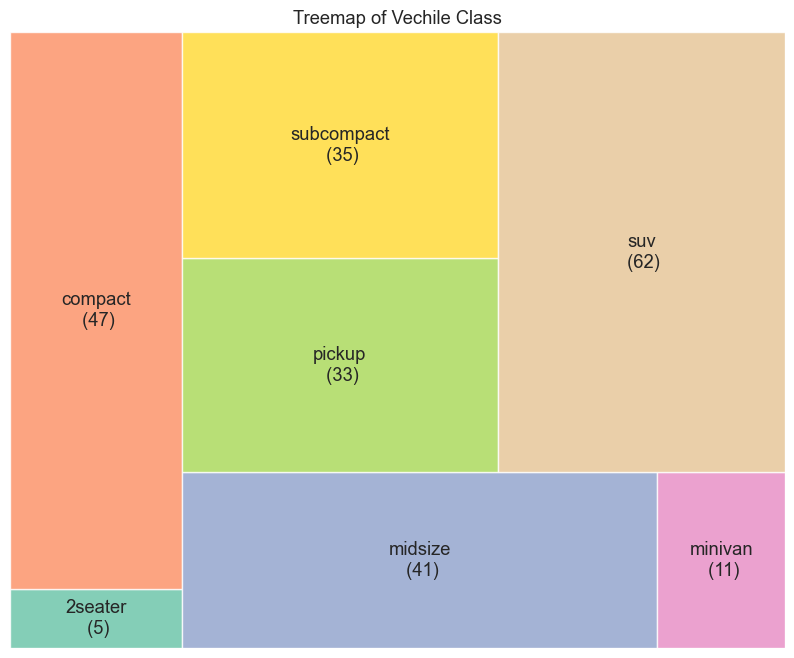

In [100]:
"""
34、树状图（Treemap）
类似饼图的效果，面积大小反应变量大小。
"""
#安装依赖包
#pip install squarify -i https://pypi.tuna.tsinghua.edu.cn/simple
import squarify

# Import Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Set2(i / float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 8), dpi=100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

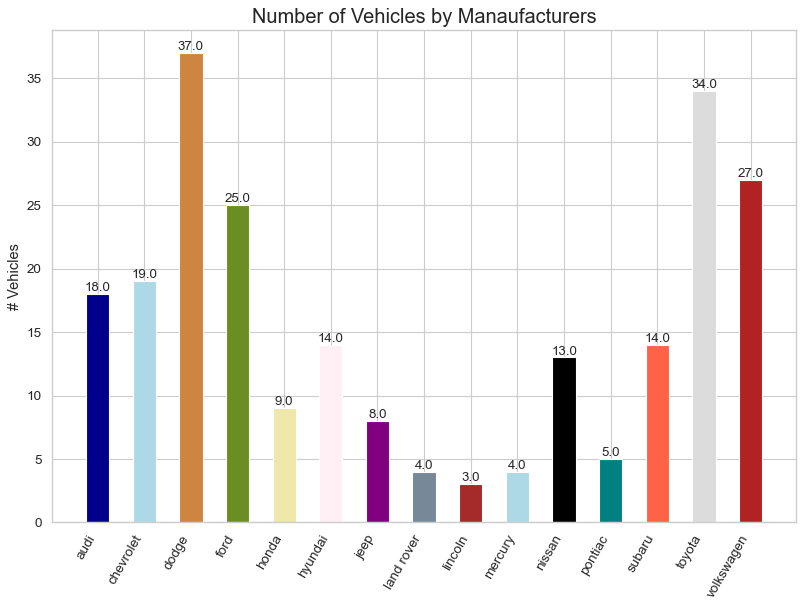

In [102]:
"""
35、柱状图（Bar Chart）
柱子高度表示变量大小。
"""
import random

# Import Data
df_raw = pd.read_csv("./datasets/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12, 8), dpi=80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i,
             val,
             float(val),
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={
                 'fontweight': 500,
                 'size': 12
             })

# Decoration
plt.gca().set_xticklabels(df['manufacturer'],
                          rotation=60,
                          horizontalalignment='right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=18)
plt.ylabel('# Vehicles')
plt.ylim=(0, 45)
plt.show()

In [ ]:
"""
更多关于柱状图：
「Python可视化|matplotlib12-垂直|水平|堆积条形图详解」
"""

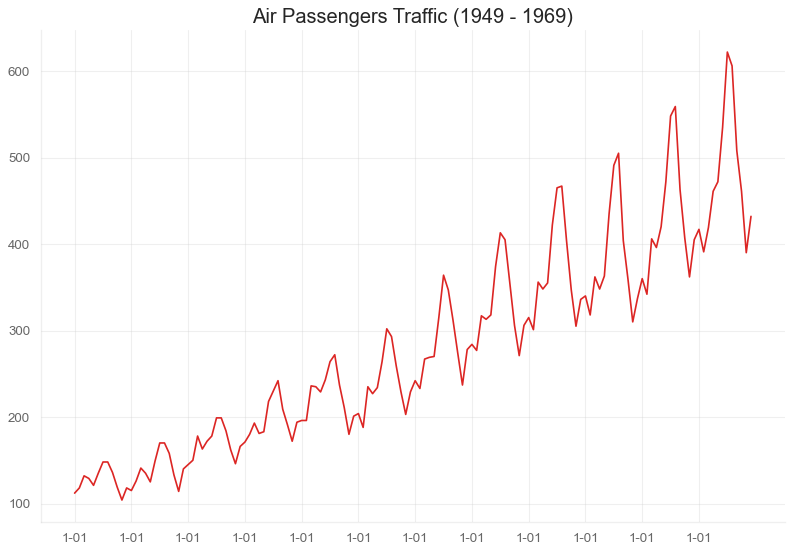

In [104]:
"""
六、变化（Change）关系图
36、时间序列图（Time Series Plot）
该图展示给定指标随时间的变化趋势。
"""
# Import Data
df = pd.read_csv('./datasets/AirPassengers.csv')

# Draw Plot
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(df['date'], df['value'], color='#dc2624')

# Decoration
plt.ylim=(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location,
           labels=xtick_labels,
           rotation=0,
           fontsize=12,
           horizontalalignment='center',
           alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=18)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

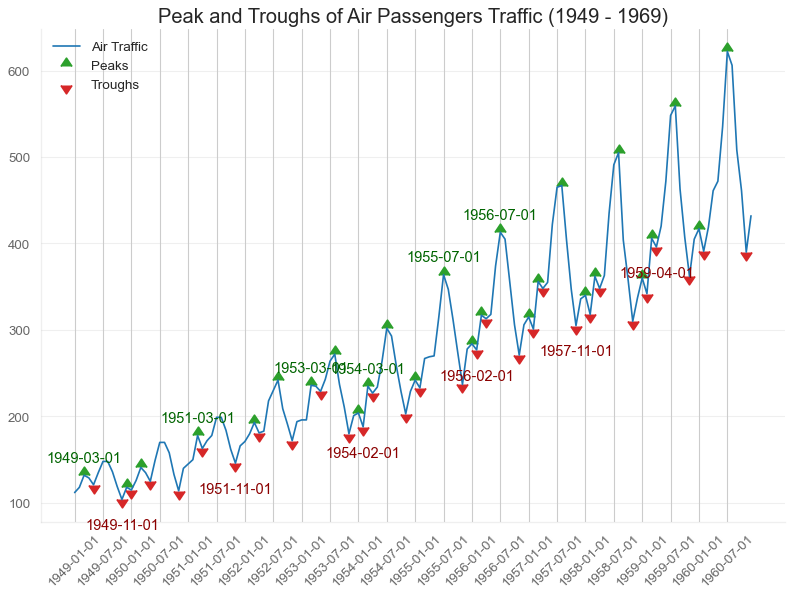

In [105]:
"""
37、波峰和波谷添加注释的时间序列图（Time Series with Peaks and Troughs Annotated）
"""
# Import Data
df = pd.read_csv('./datasets/AirPassengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(12, 8), dpi=80)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations],
            df.value[peak_locations],
            marker=mpl.markers.CARETUPBASE,
            color='tab:green',
            s=100,
            label='Peaks')
plt.scatter(df.date[trough_locations],
            df.value[trough_locations],
            marker=mpl.markers.CARETDOWNBASE,
            color='tab:red',
            s=100,
            label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p],
             df.value[p] + 15,
             df.date[p],
             horizontalalignment='center',
             color='darkgreen')
    plt.text(df.date[t],
             df.value[t] - 35,
             df.date[t],
             horizontalalignment='center',
             color='darkred')

# Decoration
plt.ylim=(50, 750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location,
           labels=xtick_labels,
           rotation=45,
           fontsize=12,
           alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)",
          fontsize=18)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

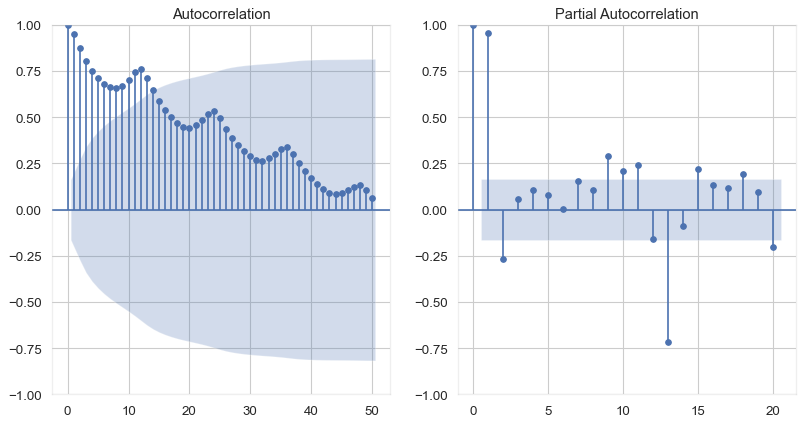

In [106]:
"""
38、自相关和部分自相关图（Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot）
自相关，展示时间序列与其自身滞后的相关性。
部分自相关，展示任何给定滞后相对于当前序列的自相关。
"""
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('./datasets/AirPassengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3)
ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3)
ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3)
ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3)
ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

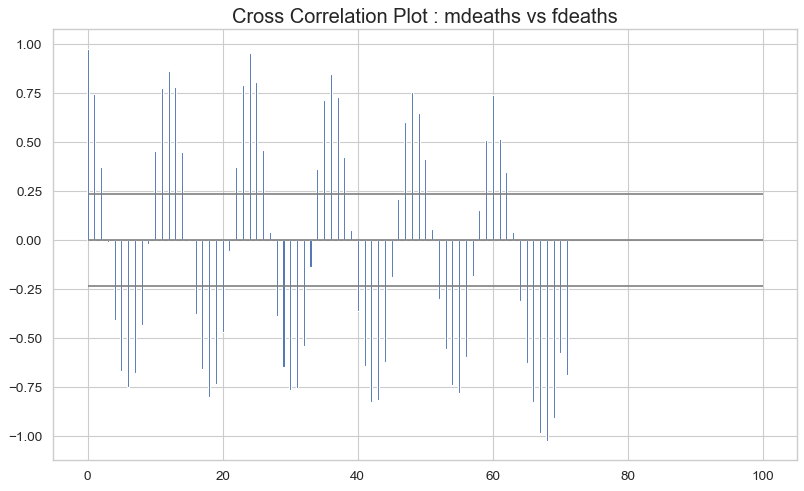

In [111]:
"""
39、交叉相关图（Cross Correlation plot）
展示两个时间序列相互之间的滞后。
"""
import statsmodels.tsa.stattools as stattools

# Import Data
df = pd.read_csv('./datasets/mortality.csv')
x = df['mdeaths']
y = df['fdeaths']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# Draw Plot
plt.figure(figsize=(12, 7), dpi=80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# Decoration
plt.title('Cross Correlation Plot : mdeaths vs fdeaths',
          fontsize=18)
plt.xlim=(0, len(ccs))
plt.show()

<Figure size 960x560 with 0 Axes>

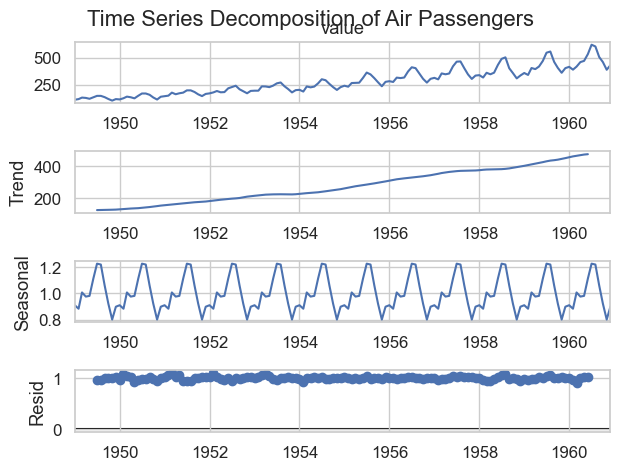

In [112]:
"""
40、时间序列分解图（Time Series Decomposition Plot）¶
该图将时间序列分解为趋势、季节和残差分量（trend, seasonal and residual components.）。
"""
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('./datasets/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# Decompose
result = seasonal_decompose(df['value'], model='multiplicative')

# Plot
plt.figure(figsize=(12, 7), dpi=80)
#plt.rcParams.update({'figure.figsize': (10, 10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

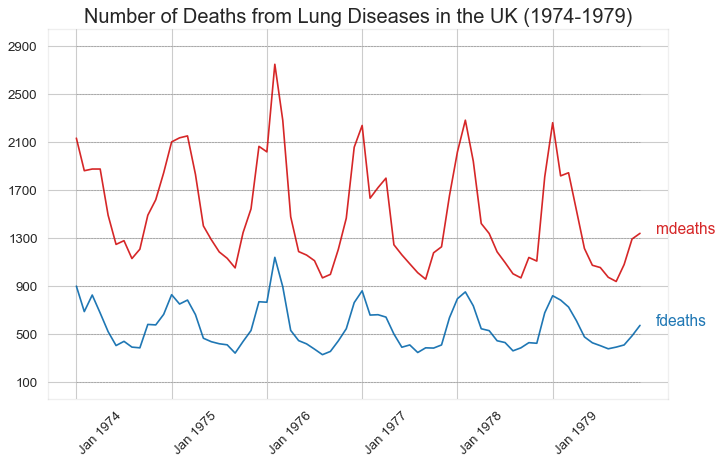

In [113]:
"""
41、多重时间序列图（Multiple Time Series）
"""
# Import Data
df = pd.read_csv('./datasets/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max() * 1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

# Draw Plot and Annotate
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=80)

columns = df.columns[1:]
for i, column in enumerate(columns):
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])
    plt.text(df.shape[0] + 1,
             df[column].values[-1],
             column,
             fontsize=14,
             color=mycolors[i])

# Draw Tick lines
for y in range(y_LL, y_UL, y_interval):
    plt.hlines(y,
               xmin=0,
               xmax=71,
               colors='black',
               alpha=0.3,
               linestyles="--",
               lw=0.5)

# Decorations
plt.tick_params(axis="both",
                which="both",
                bottom=False,
                top=False,
                labelbottom=True,
                left=False,
                right=False,
                labelleft=True)

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)',
          fontsize=18)
plt.yticks(range(y_LL, y_UL, y_interval),
           [str(y) for y in range(y_LL, y_UL, y_interval)],
           fontsize=12)
plt.xticks(range(0, df.shape[0], 12),
           df.date.values[::12],
           horizontalalignment='left',
           rotation=45,
           fontsize=12)
plt.ylim=(y_LL, y_UL)
plt.xlim=(-2, 80)
plt.show()

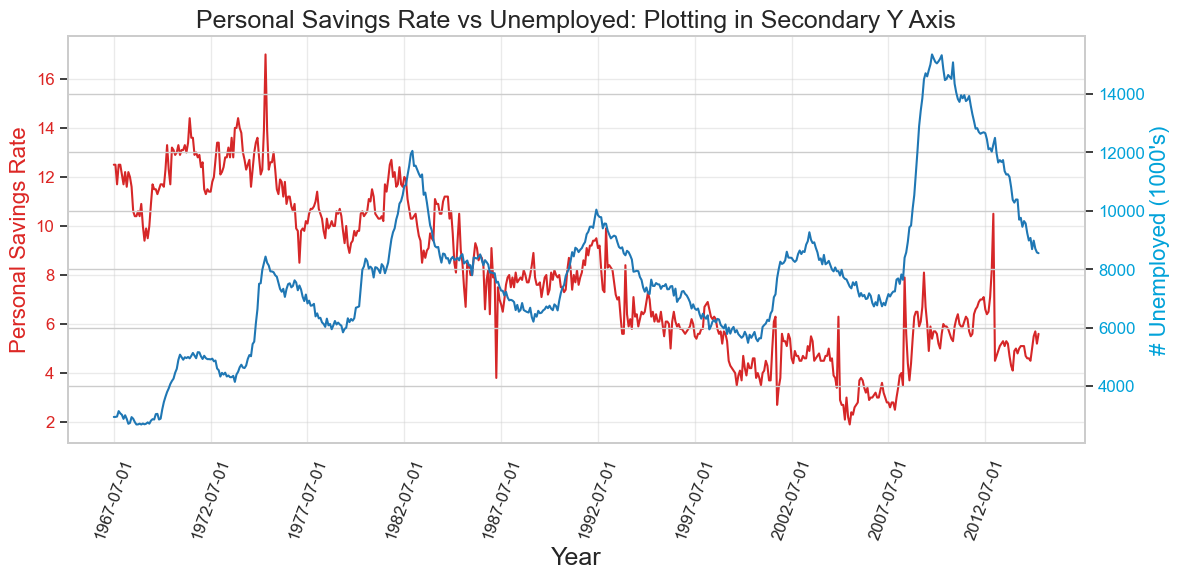

In [114]:
"""
42、双坐标系时间序列图（Plotting with different scales using secondary Y axis）
"""
# Import Data
df = pd.read_csv("./datasets/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=18)
ax1.tick_params(axis='x', rotation=70, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='#dc2624', fontsize=16)
ax1.tick_params(axis='y', rotation=0, labelcolor='#dc2624')
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='#01a2d9', fontsize=16)
ax2.tick_params(axis='y', labelcolor='#01a2d9')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize': 10})
ax2.set_title(
    "Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis",
    fontsize=18)
fig.tight_layout()
plt.show()

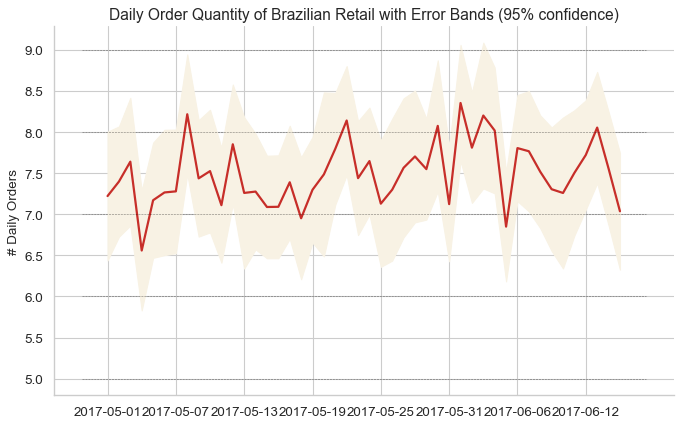

In [115]:
"""
43、带误差阴影的时间序列图（Time Series with Error Bands）
"""
from dateutil.parser import parse
from scipy.stats import sem

# Import Data
df_raw = pd.read_csv('./datasets/orders_45d.csv',
                     parse_dates=['purchase_time', 'purchase_date'])

# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(10, 6), dpi=80)
plt.ylabel("# Daily Orders", fontsize=12)
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="#c72e29", lw=2)
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#f8f2e4")

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]], fontsize=12)
plt.title(
    "Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)",
    fontsize=14)

# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim=(s, e - 2)
plt.ylim=(4, 10)

# Draw Horizontal Tick lines
for y in range(5, 10, 1):
    plt.hlines(y,
               xmin=s,
               xmax=e,
               colors='black',
               alpha=0.5,
               linestyles="--",
               lw=0.5)

plt.show()

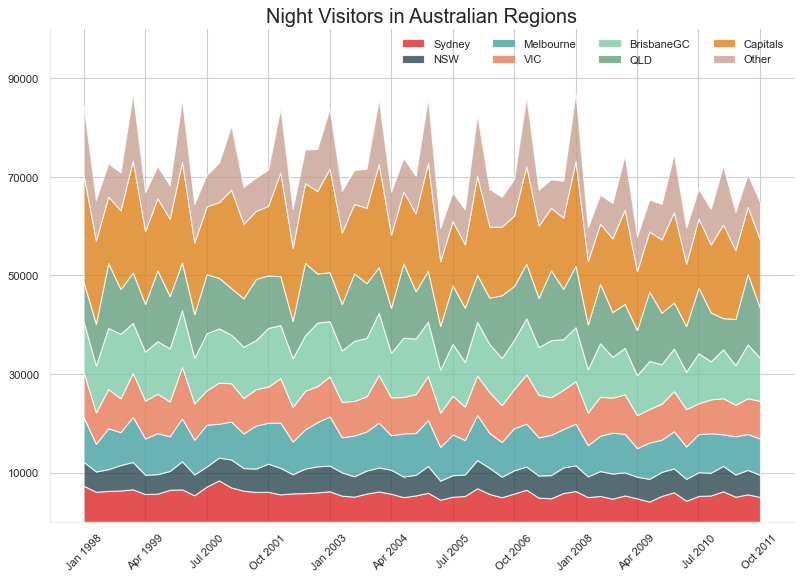

In [116]:
"""
44、堆积面积图（Stacked Area Chart）
"""
# Import Data
df = pd.read_csv('./datasets/nightvisitors.csv')

# Decide Colors 
mycolors = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59', '#7dcaa9', '#649E7D', '#dc8018', '#C89F91']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(12, 8), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# Prepare data
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# Plot for each column
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)
ax.tick_params(axis='x', rotation=45, labelsize=12)
# Decorations
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim=(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

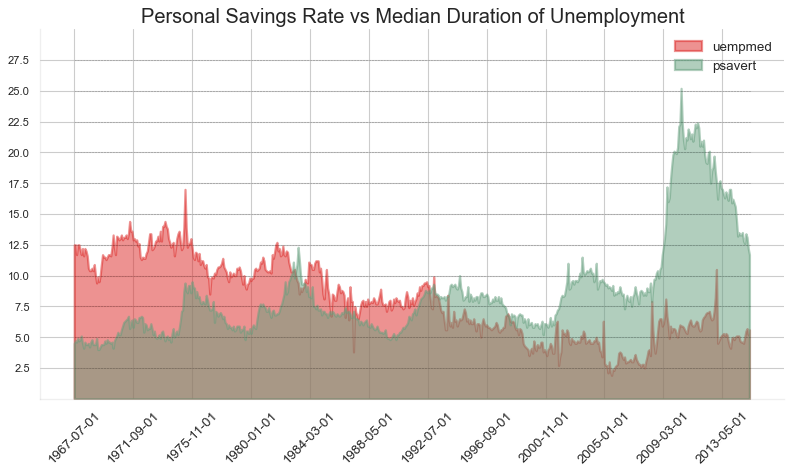

In [117]:
"""
45、非堆积面积图（Area Chart UnStacked）
"""
# Import Data
df = pd.read_csv("./datasets/economics.csv")

# Prepare Data
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
columns = ['psavert', 'uempmed']

# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=80)
ax.fill_between(x,
                y1=y1,
                y2=0,
                label=columns[1],
                alpha=0.5,
                color='#dc2624',
                linewidth=2)
ax.fill_between(x,
                y1=y2,
                y2=0,
                label=columns[0],
                alpha=0.5,
                color='#649E7D',
                linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment',
             fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim=(-10, x[-1])
plt.tick_params(axis='x', rotation=45, labelsize=12)

# Draw Tick lines
for y in np.arange(2.5, 30.0, 2.5):
    plt.hlines(y,
               xmin=0,
               xmax=len(x),
               colors='black',
               alpha=0.3,
               linestyles="--",
               lw=0.5)

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

(<Figure size 800x400 with 1 Axes>,
 array([<AxesSubplot: ylabel='2014'>], dtype=object))

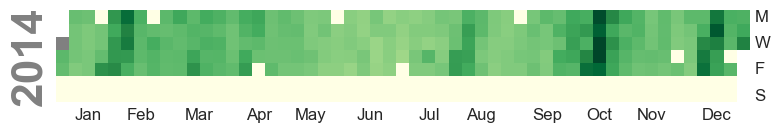

In [121]:
"""
46、日历热力图（Calendar Heat Map）
很好地展示数据在假日的趋势。
"""
#安装依赖包
#pip install calmap  -i https://pypi.tuna.tsinghua.edu.cn/simple
import numpy as np
np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap
# Import Data
df = pd.read_csv("./datasets/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
events = df['2014']['VIX.Close']
calmap.calendarplot(events,
                    monthticks=3,
                    daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6],
                    cmap='YlGn',
                    fillcolor='grey',
                    linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))

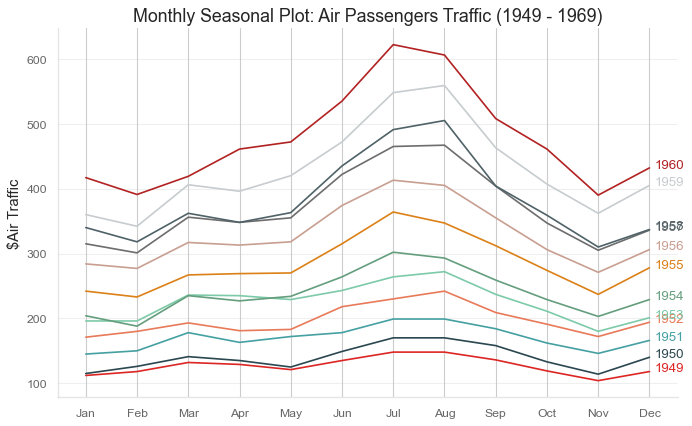

In [123]:
"""
47、季节图（Seasonal Plot）
该图比较某个指标在不同年份同一天/年/月/周等的时间序列的表现。
"""
from dateutil.parser import parse

# Import Data
df = pd.read_csv('./datasets/AirPassengers.csv')

# Prepare data
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot

mycolors = [
    '#dc2624', '#2b4750', '#45a0a2', '#e87a59', '#7dcaa9', '#649E7D',
    '#dc8018', '#C89F91', '#6c6d6c', '#4f6268', '#c7cccf', 'firebrick'
]
plt.figure(figsize=(10, 6), dpi=80)

for i, y in enumerate(years):
    plt.plot('month',
             'value',
             data=df.loc[df.year == y, :],
             color=mycolors[i],
             label=y)
    plt.text(df.loc[df.year == y, :].shape[0] - .9,
             df.loc[df.year == y, 'value'][-1:].values[0],
             y,
             fontsize=12,
             color=mycolors[i])

# Decoration
plt.ylim=(50, 750)
plt.xlim=(-0.3, 11)
plt.ylabel('$Air Traffic')
plt.yticks(fontsize=11, alpha=.7)
plt.xticks(fontsize=11, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)",
          fontsize=16)
plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.5)
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

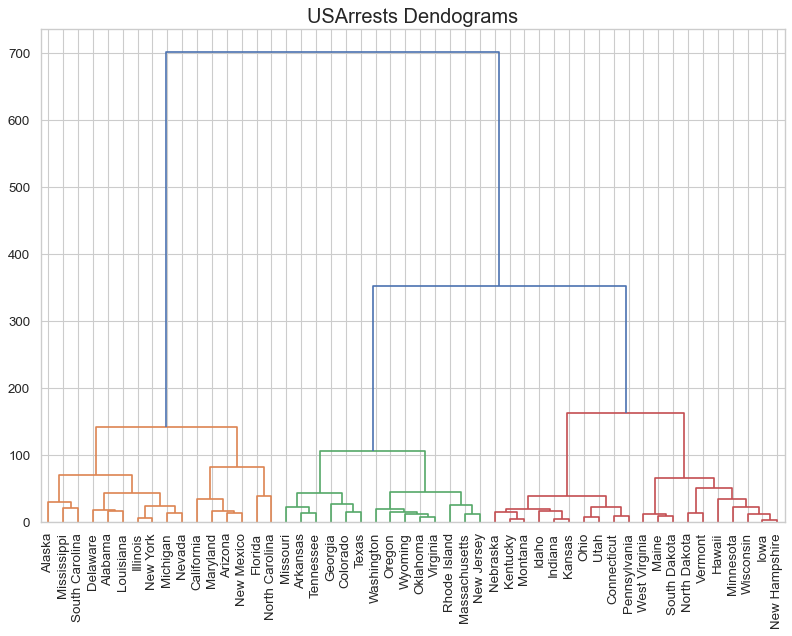

In [124]:
"""
七、分组（ Groups）关系图
48、聚类树形图（Dendrogram）
展示通过聚类形成的组内及组间相似性水平。
"""
import scipy.cluster.hierarchy as shc

# Import Data
df = pd.read_csv('./datasets/USArrests.csv')

# Plot
plt.figure(figsize=(12, 8), dpi=80)
plt.title("USArrests Dendograms", fontsize=18)
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop',
                                      'Rape']],
                                  method='ward'),
                      labels=df.State.values,
                      color_threshold=200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

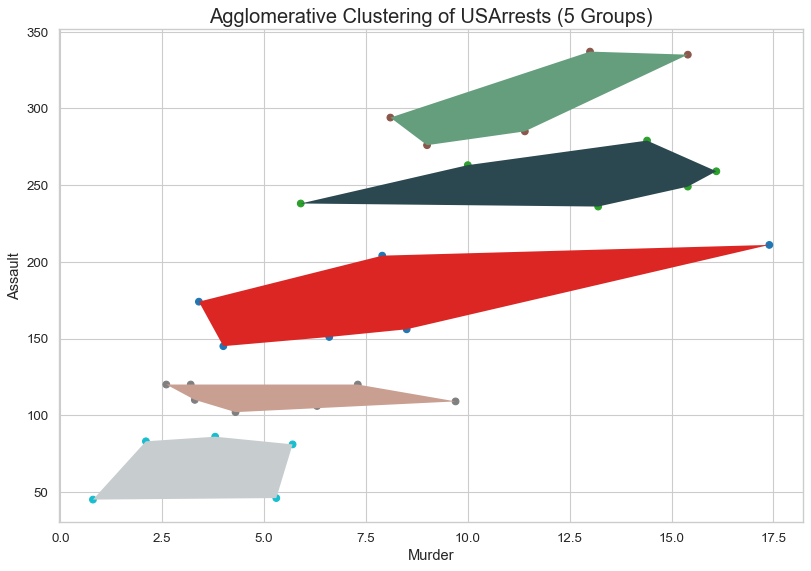

In [127]:
"""
49、聚类图（Cluster Plot）
通过聚类计算距离，将同一类圈起来。
"""
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('./datasets/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# Plot
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap='tab10')


# Encircle
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Draw polygon surrounding vertices
encircle(df.loc[cluster.labels_ == 0, 'Murder'],
         df.loc[cluster.labels_ == 0, 'Assault'],
         ec="k",
         fc="#dc2624",
         linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'],
         df.loc[cluster.labels_ == 1, 'Assault'],
         ec="k",
         fc="#2b4750",
         linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'],
         df.loc[cluster.labels_ == 2, 'Assault'],
         ec="k",
         fc="#649E7D",
         linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'],
         df.loc[cluster.labels_ == 3, 'Assault'],
         ec="k",
         fc="#C89F91",
         linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'],
         df.loc[cluster.labels_ == 4, 'Assault'],
         ec="k",
         fc="#c7cccf",
         linewidth=0)

# Decorations
plt.xlabel('Murder')
plt.xticks(fontsize=12)
plt.ylabel('Assault')
plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=18)
plt.show()

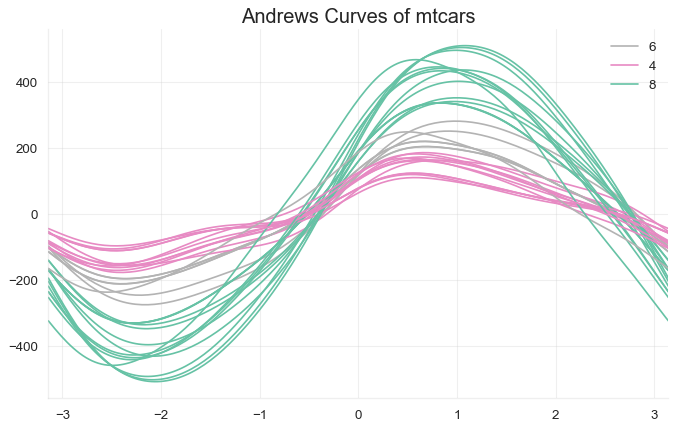

In [128]:
"""
50、安德鲁斯曲线（Andrews Curve）
展示是否存在基于给定分组的特征的固有分组。例如下图，如果数据集中的列不能帮助区分组（cyl），则行将不会被很好地分隔开。
"""
from pandas.plotting import andrews_curves

# Import
df = pd.read_csv("./datasets/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(10, 6), dpi=80)
andrews_curves(df, 'cyl', colormap='Set2_r')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=18)
plt.xlim=(-3, 3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

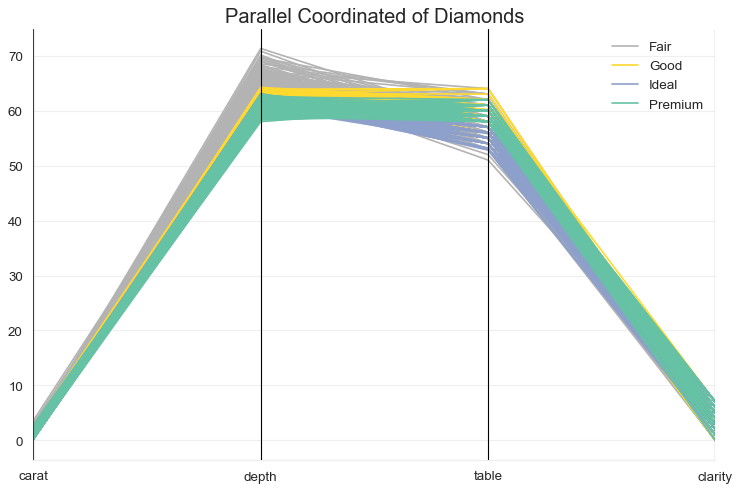

In [129]:
"""
51、平行坐标图（Parallel Coordinates）
展示某个特征是否有助于分组。如果一个特征隔离，分组受到影响，则该特征对该分组非常必要。
"""
from pandas.plotting import parallel_coordinates

# Import Data
df_final = pd.read_csv("./datasets/diamonds_filter.csv")

# Plot
plt.figure(figsize=(11, 7), dpi=80)
parallel_coordinates(df_final, 'cut', colormap='Set2_r')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=18)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
"""
致谢：https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
更多Python可视化文章及代码，请关注公众号：pythonic生物人。
"""